# Chapter 5

# Building blocks of deep learning - Part 2

# What lies ahead for you in this lecture?

# What lies ahead for you in this lecture?

In the previous part you learnt about the basic elements of pytorch. In this chapter you will use those components of pytorch to 
- Replicate perceptron and MLPs using pytorch
- Train a digit recognization system

![](https://drive.google.com/uc?export=view&id=1CabeVRuA0IQDPVd-IctuTDqTEmtXJh4S)



# Revisiting perceptron

In this section we will revisit perceptron from Lecture 3, but with a goal to replicate the same using pytorch library.  

In [ ]:
# Update matplotlib to exploit its axline feature
! pip install -U matplotlib

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 44.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os 
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
# Import pytorch library
import torch

# Import two important sub-parts of torch
from torch import nn, optim

## nn and optim

nn stands for neural networks, and it includes every component required to design a neural network. For a neural network in pytorch the most important component is layer. 

Even a single perceptron is a layer in itself. This single layer can have multiple perceptron or can can multiple layers each have many perceptrons, which we called multiple layer perceptron (mlp) before. 

We also learnt about gradient descent and stochastic gradient descent, which were essentially calculating the backpropagation and also backpropagating the weights (to update the weight). This functionality of optimization is carried about by optim module which has different optimizers such as stochastic gradient descent, Adam, Adagrad, etc.  

In [ ]:
# Replicate the dummy data functions from chapter 3

In [ ]:
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

def generate_small_data():
    X1 = np.array([[2.5, 1.5], [2.8, 4.1], [1.7, 7.2], [6.1, 2.0], [5.3, 3.2], [4.7, 4.8]])
    Y1 = np.array([1, 1, 1, 1, 1, 1])
    X2 = np.array([[-3.5, 6.4], [-2.8, 5.6], [1.5, 1.2], [-4.8, 0.2], [-3.8, 5.2], [-1.2, 6.8]])
    Y2 = np.array([0, 0, 0, 0, 0, 0])

    all_x = np.concatenate((X1, X2))
    all_y = np.concatenate((Y1, Y2))

    plt.plot(X1[:, 0][Y1 == 1], X1[:, 1][Y1 == 1], 'g^')
    plt.plot(X2[:, 0][Y2 == 0], X2[:, 1][Y2 == 0], 'bs')

    return X1, Y1, X2, Y2, all_x, all_y



def generate_large_data():
    separable = False
    while not separable:
        samples = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
        X1 = samples[0][samples[1] == 0]
        X2 = samples[0][samples[1] == 1]
        separable = any([X1[:, k].max() < X2[:, k].min() or X1[:, k].min() > X2[:, k].max() for k in range(2)])
    plt.plot(X1[:, 0], X1[:, 1], 'r.')
    plt.plot(X2[:, 0], X2[:, 1], 'b.')
    plt.show()

    all_x = np.concatenate((X1, X2))
    Y1 = np.array([1]*len(X1))
    Y2 = np.array([0]*len(X2))
    all_y = np.concatenate((Y1, Y2))

    all_x, all_y = shuffle(all_x, all_y)

    # Training set
    train_set_x = all_x[0:950, :];
    train_set_y = all_y[0:950];

    # Test set
    test_set_x = all_x[950:,:];
    test_set_y = all_y[950:];

    return X1, Y1, X2, Y2, train_set_x, train_set_y, test_set_x, test_set_y

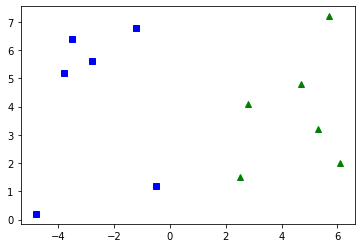

In [ ]:
X1, Y1, X2, Y2, all_x, all_y = generate_small_data()

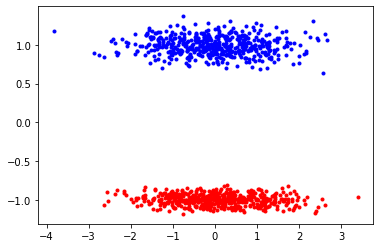

In [ ]:
X1, Y1, X2, Y2, train_set_x, train_set_y, test_set_x, test_set_y = generate_large_data()

In [ ]:
# Our old basic code of perceptron

# This perceptron can take any number of inputs
# The weights be initiazed with HE initializer
# The bias is initialized to zero
# The perceptron has activation sigmoid

class Perceptron:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs;    # New variable added 
        self.y = None;                   # Temporary output
        self.z = None;                   # Final output

        # Initialize weights
        self.weights_vec = np.random.rand(num_inputs)*np.sqrt(2/(num_inputs+1));
        self.bias_vec = np.zeros(1);

    def activation(self, input):
        return 1/(1+np.exp(-input));

    def forward(self, input_vec):
        self.y = np.dot(input_vec, self.weights_vec) + self.bias_vec;
        self.z = self.activation(self.y);
        return self.z;

## How do we do the same in pytorch?

We had a class in our normal perceptron code, in pytorch too you have the same. But this class inherits all the functionaly of "torch.nn.module". 

Old way:
```
class Perceptron:
```

Pytorch way:
```
class Perceptron_Pytorch(torch.nn.Module):
    ...
```

This module allows you to create any kind of complex neural network in pytorch and set the flow of data. There is another simpler way of doing things using "sequential" module. But its always good to know the more flexible way from the beginning. 


First we introduced weights and initialized. Instead of that we create a layer, we need not specify the matrix size of weights or biases, pytorch will take care of it.

Old way:

```
# Initialize weights
        self.weights_vec = np.random.rand(num_inputs)*np.sqrt(2/(num_inputs+1));
        self.bias_vec = np.zeros(1);
```

Updated way:

```
self.neuron = nn.Linear(self.num_inputs,1);
```

This Linear module takes two arguments:
- Number of inputs it has
- Number of outputs it will have

Number of outputs decide whether it is a single perceptron or multiple neurons. Since we are taking about one output we are calling it a neuron. 

Pytorch auto-initializes the neuron (the layer basically) with weights and biases, but you can also do it manually as shown below. 

```
# Even though the weights are self initialized we will re-initialize them using HE initializer
        nn.init.kaiming_uniform_(self.neuron.weight, nonlinearity='sigmoid')
        nn.init.zeros_(self.neuron.bias);
```

For that you need to use nn.init (short for initializer) module. We will take up all the initializers in upcoming parts. 

Moving on, the next step is an activation function, and earlier we were using sigmoid activation function. Pytorch has its own sigmoid functionality. This also can be considered as a layer. 

Old way:

```
def activation(self, input):
    return 1/(1+np.exp(-input));
```


Pytorch way:

```
self.act = nn.Sigmoid();
```

This self.act and self.neuron can be considered as functions in itself. They can take arguments as inputs data. This will become more clear with the forward functionality.

Old way:

```
def forward(self, input_vec):
        self.y = np.dot(input_vec, self.weights_vec) + self.bias_vec;
        self.z = self.activation(self.y);
        return self.z;
```


Pytorch way:

```
def forward(self, input_vec):
        #torch doesn't work with numpy arrays or lists
        input_vec = torch.FloatTensor(input_vec)

        self.y = self.neuron(input_vec);
        self.z = self.act(self.y);
        return self.z
```

Instead of you manually specifying how the weights should be multiplied and bias should be added, you just pass the input vector to the neuron function and it takes care of the calculation. The same is the case with activation. 



In [ ]:
# Equivalent code of pytorch 

class Perceptron_Pytorch(torch.nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron_Pytorch, self).__init__()
        self.num_inputs = num_inputs;

        # Create a layer
        self.neuron = nn.Linear(self.num_inputs,1);

        # Create activation layer
        self.act = nn.Sigmoid() 

        # Even though the weights are self initialized we will re-initialize them using HE initializer
        nn.init.kaiming_uniform_(self.neuron.weight, nonlinearity='sigmoid')
        nn.init.zeros_(self.neuron.bias);


    def forward(self, input_vec):
        #torch doesn't work with numpy arrays or lists
        input_vec = torch.FloatTensor(input_vec)

        self.y = self.neuron(input_vec);
        self.z = self.act(self.y);
        return self.z

In [ ]:
old_perceptron = Perceptron(2)
new_perceptron = Perceptron_Pytorch(2);

Earlier, since we wrote the entire code from scratch we knew how to extract the weights and bias vectors

```
old_perceptron.weights_vec
old_perceptron.bias_vec
```

The new way to extract is to access the nn.Linear object
```
new_perceptron.neuron.weight
new_perceptron.neuron.bias
```

Our class object is new_perceptron, it has the element named "neuron" which is an object of type nn.Linear. It stores the weight and the bias

In [ ]:
print("For old perceptron");
print("initial weights: ", old_perceptron.weights_vec);
print("initial bias:", old_perceptron.bias_vec);
print("\n");


print("For new perceptron");
print("initial weights: ", new_perceptron.neuron.weight);
print("initial bias:", new_perceptron.neuron.bias);
print("\n");

For old perceptron
initial weights:  [0.04826592 0.55191702]
initial bias: [0.]


For new perceptron
initial weights:  Parameter containing:
tensor([[-1.1522,  0.1338]], requires_grad=True)
initial bias: Parameter containing:
tensor([0.], requires_grad=True)




In [ ]:
# Requires grad means it is trainabale, updatable during backpropagation

In [ ]:
# Since weights are randomly inititalized they are different

The way to run it forward is same as per the function name we gave. 

In [ ]:
# Forward
print("old_perceptron");
output = old_perceptron.forward(X1[0]);
print(output)
print("\n");

print("new_perceptron")
output = new_perceptron.forward(X1[0]);
print(output)

old_perceptron
[0.35824479]


new_perceptron
tensor([0.6902], grad_fn=<SigmoidBackward0>)


The entire perceptron code from chapter 3 had more components
- calculating loss
- calculating backpropagation
- backpropagating the weights
- learning rate based training
- running for an iteration, epoch and multiple epochs

The entire code shown below, you have already seen it in previous chapters

In [ ]:
from tqdm import tqdm

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01):
        self.num_inputs = num_inputs;
        self.learning_rate = learning_rate;
        self.y = None;                   # Temporary output
        self.z = None;                   # Final output

        self.weights_vec = np.random.rand(num_inputs)*np.sqrt(2/(num_inputs+1));
        self.bias_vec = np.zeros(1);
        self.loss = 0;
        self.backprop_weight_vec = 0;
        self.backprop_bias_vec = 0;
        self.loss_data = [];

    def activation(self, input):
        return 1/(1+np.exp(-input));

    def forward(self, input_vec):
        self.y = np.dot(input_vec, self.weights_vec) + self.bias_vec;
        self.z = self.activation(self.y);
        return self.z;

    def calculate_loss(self, predicted, target):
        self.loss = np.square(np.subtract(predicted, target)).mean();

    def calculate_backpropagation(self, predicted, target, input_vec):
        self.backprop_weight_vec += self.learning_rate*(predicted-target) * predicted * (1-predicted) * input_vec;
        self.backprop_bias_vec += self.learning_rate*(predicted-target) * predicted * (1-predicted);

    def backpropagate_weights(self):
        self.weights_vec -= self.backprop_weight_vec;
        self.bias_vec -= self.backprop_bias_vec;

    def run_for_an_iteration(self, input_vec, target_vec):
        output = self.forward(input_vec);
        self.calculate_loss(output, target_vec);
        self.calculate_backpropagation(output, target_vec, input_vec);  

    def run_for_an_epoch(self, input_vecs, target_vecs):
        self.loss = 0;
        self.backprop_weight_vec = 0;
        self.backprop_bias_vec = 0;
        self.loss_data.append(0);
        for i in range(len(input_vecs)):
            self.run_for_an_iteration(input_vecs[i], target_vecs[i]);
            self.loss_data[-1] += self.loss;

        # Take average of loss, backprop_weight_vec, and backprop_bias_vec
        self.loss_data[-1] /= len(input_vecs);
        self.backprop_weight_vec /= len(input_vecs);
        self.backprop_bias_vec /= len(input_vecs);

        # Now update the weight
        self.backpropagate_weights();


    def run_for_more_epochs(self, input_vecs, target_vecs, num_epochs=1000):
        for i in tqdm(range(num_epochs)):
            self.run_for_an_epoch(input_vecs, target_vecs)

Lets see how do we do the same using Pytorch

You need not specify manually how the MSE loss function looks like.

Old way:
```
def calculate_loss(self, predicted, target):
        self.loss = np.square(np.subtract(predicted, target)).mean();
```

Pytorch way:
```
self.loss_function = torch.nn.MSELoss();
```


You had to manually define how the backpropagation vector would be calculated, but in pytorch you define your optimizer and leave everything to it.

Old way:
```
def calculate_backpropagation(self, predicted, target, input_vec):
        self.backprop_weight_vec += self.learning_rate*(predicted-target) * predicted * (1-predicted) * input_vec;
        self.backprop_bias_vec += self.learning_rate*(predicted-target) * predicted * (1-predicted);

    def backpropagate_weights(self):
        self.weights_vec -= self.backprop_weight_vec;
        self.bias_vec -= self.backprop_bias_vec;
```


Pytorch way:
```
self.optimizer = torch.optim.SGD(self.parameters(), lr = self.learning_rate)
```

You create an optimizer that is of type Stochastic Gradient Descent. You provide the learning rate and you provide a set of paramaters that will get updated during backpropagation. Since your class is inherited from the nn.Module class, the moment you create a layer or activation or anything, self.parameters is auto-created which stored details of all the weights and biases!!!! Pretty helpful right!!!

Remember the four step process in an iteration
- Calculate the output using input vector
- Then calculate the loss using output and target value
- Then, calculate backpropagation value for each weight and bias
- And finally update the weights
 
Epoch and iterations were working like this the old way:
```
    def run_for_an_iteration(self, input_vec, target_vec):
        output = self.forward(input_vec);
        self.calculate_loss(output, target_vec);
        self.calculate_backpropagation(output, target_vec, input_vec);  

    def run_for_an_epoch(self, input_vecs, target_vecs):
        self.loss = 0;
        self.backprop_weight_vec = 0;
        self.backprop_bias_vec = 0;
        self.loss_data.append(0);
        for i in range(len(input_vecs)):
            self.run_for_an_iteration(input_vecs[i], target_vecs[i]);
            self.loss_data[-1] += self.loss;

        # Take average of loss, backprop_weight_vec, and backprop_bias_vec
        self.loss_data[-1] /= len(input_vecs);
        self.backprop_weight_vec /= len(input_vecs);
        self.backprop_bias_vec /= len(input_vecs);

        # Now update the weight
        self.backpropagate_weights();

```

Since you had no way to input all data points directly onto the system, you required an iteration where you calculated all losses in loop and then averaged it to backpropagate.

We can use simply an epoch where we run all the inputs in a single line of code.

Step 0: Reset all backpropagation vector
```
        # First remove old backpropagation
        # In old way we made all backpropagation_vec as 0
        self.optimizer.zero_grad()
```


Step 1: Calculate the output using input vector
```

        input_vecs = torch.FloatTensor(input_vecs);
        target_vecs = torch.FloatTensor(target_vecs);

        # Forward pass
        all_predictions = self.forward(input_vecs)
```

Step 2: Then calculate the loss using output and target value
```
        # Compute Loss
        self.loss = self.loss_function(all_predictions.squeeze(), target_vecs)
```


Step 3: Then, calculate backpropagation value for each weight and bias
```
        # Calculate backpropagation
        self.loss.backward()
```

Step 4: And finally update the weights
```
        # Backpropagate weights
        self.optimizer.step()
```


In [ ]:
# Whole code is as shown below

In [ ]:
from tqdm import tqdm 
class Perceptron_Pytorch(torch.nn.Module):
    def __init__(self, num_inputs, learning_rate):
        super(Perceptron_Pytorch, self).__init__()
        self.num_inputs = num_inputs;
        self.learning_rate = learning_rate;

        # Create a layer
        self.neuron = nn.Linear(self.num_inputs,1);

        # Create activation layer
        self.act = nn.Sigmoid() 

        # Even though the weights are self initialized we will re-initialize them using HE initializer
        nn.init.kaiming_uniform_(self.neuron.weight, nonlinearity='sigmoid')
        nn.init.zeros_(self.neuron.bias);

        # Create a loss functionality
        self.loss_function = torch.nn.MSELoss()

        # Create an optimizer which will auto-backpropagate weights
        self.optimizer = torch.optim.SGD(self.parameters(), lr = self.learning_rate)


    def forward(self, input_vec):
        #torch doesn't work with numpy arrays or lists
        input_vec = torch.FloatTensor(input_vec)

        self.y = self.neuron(input_vec);
        self.z = self.act(self.y);
        return self.z


    def run_for_an_epoch(self, input_vecs, target_vecs):
        # First remove old backpropagation
        # In old way we made all backpropagation_vec as 0
        self.optimizer.zero_grad()

        input_vecs = torch.FloatTensor(input_vecs);
        target_vecs = torch.FloatTensor(target_vecs);

        # Forward pass
        all_predictions = self.forward(input_vecs)

        # Compute Loss
        self.loss = self.loss_function(all_predictions.squeeze(), target_vecs)

        # Calculate backpropagation
        self.loss.backward()

        # Backpropagate weights
        self.optimizer.step()

    def run_for_more_epochs(self, input_vecs, target_vecs, num_epochs=1000):
        for i in tqdm(range(num_epochs)):
            self.run_for_an_epoch(input_vecs, target_vecs)

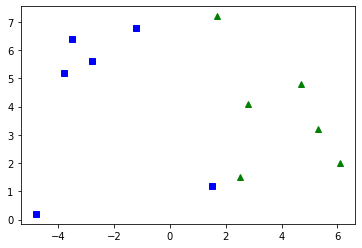

In [ ]:
X1, Y1, X2, Y2, all_x, all_y = generate_small_data()

new_perceptron
initial weights:  Parameter containing:
tensor([[-0.6597, -0.1520]], requires_grad=True)
initial bias: Parameter containing:
tensor([0.], requires_grad=True)


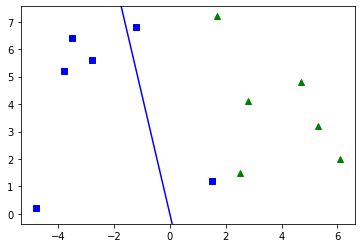

In [ ]:
from matplotlib import pyplot as plt

print("new_perceptron");
new_perceptron = Perceptron_Pytorch(2, 0.1);
print("initial weights: ", new_perceptron.neuron.weight);
print("initial bias:", new_perceptron.neuron.bias);

W_old = new_perceptron.neuron.weight.detach().numpy()[0];
b_old = new_perceptron.neuron.bias.detach().numpy();

plt.axline([-b_old[0]/W_old[0], 0], slope=-W_old[0]/W_old[1], color='blue')
plt.plot(X1[:, 0][Y1 == 1], X1[:, 1][Y1 == 1], 'g^')
plt.plot(X2[:, 0][Y2 == 0], X2[:, 1][Y2 == 0], 'bs')

In [ ]:
# After running for one epoch we notice if the weights are updated or not

Epoch loss: 0.6964687705039978


updated weights:  Parameter containing:
tensor([[-0.6203, -0.1825]], requires_grad=True)
updated bias: Parameter containing:
tensor([-0.0046], requires_grad=True)


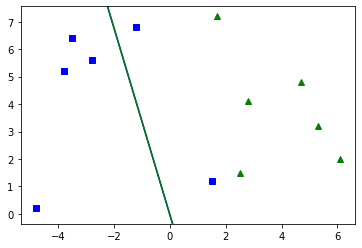

In [ ]:
new_perceptron.run_for_an_epoch(all_x, all_y);
print('Epoch loss: {}'.format(new_perceptron.loss.item()));
print("\n");

print("updated weights: ", new_perceptron.neuron.weight);
print("updated bias:", new_perceptron.neuron.bias);

W_new = new_perceptron.neuron.weight.detach().numpy()[0];
b_new = new_perceptron.neuron.bias.detach().numpy();

plt.axline([-b_old[0]/W_old[0], 0], slope=-W_old[0]/W_old[1], color='blue')
plt.axline([-b_new[0]/W_new[0], 0], slope=-W_new[0]/W_new[1], color='green')
plt.plot(X1[:, 0][Y1 == 1], X1[:, 1][Y1 == 1], 'g^')
plt.plot(X2[:, 0][Y2 == 0], X2[:, 1][Y2 == 0], 'bs')

In [ ]:
new_perceptron.run_for_more_epochs(all_x, all_y, num_epochs=10000);

100%|██████████| 10000/10000 [00:04<00:00, 2220.11it/s]


updated weights:  Parameter containing:
tensor([[2.5312, 0.6393]], requires_grad=True)
updated bias: Parameter containing:
tensor([-5.7543], requires_grad=True)


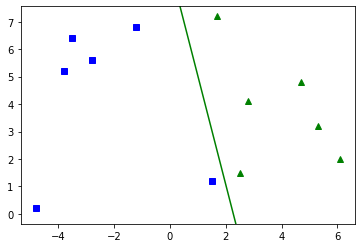

In [ ]:
print("updated weights: ", new_perceptron.neuron.weight);
print("updated bias:", new_perceptron.neuron.bias);

W_new = new_perceptron.neuron.weight.detach().numpy()[0];
b_new = new_perceptron.neuron.bias.detach().numpy();

plt.axline([-b_new[0]/W_new[0], 0], slope=-W_new[0]/W_new[1], color='green')
plt.plot(X1[:, 0][Y1 == 1], X1[:, 1][Y1 == 1], 'g^')
plt.plot(X2[:, 0][Y2 == 0], X2[:, 1][Y2 == 0], 'bs')

In [ ]:
# Update the code for mini-batch stochastic gradient descent

Like last time we added this code for random selection of data

```
# getting random minibatch
idx = np.random.randint(len(input_vecs), size=self.batch_size)
input_vecs = input_vecs[idx,:]
target_vecs = target_vecs[idx]
```

In [ ]:
from tqdm import tqdm 
class Perceptron_Pytorch(torch.nn.Module):
    def __init__(self, num_inputs, learning_rate=0.01,  batch_size=10):
        super(Perceptron_Pytorch, self).__init__()
        self.num_inputs = num_inputs;
        self.learning_rate = learning_rate;
        self.loss_data = [];
        self.batch_size = batch_size;

        # Create a layer
        self.neuron = nn.Linear(self.num_inputs,1);

        # Create activation layer
        self.act = nn.Sigmoid() 

        # Even though the weights are self initialized we will re-initialize them using HE initializer
        nn.init.kaiming_uniform_(self.neuron.weight, nonlinearity='sigmoid')
        nn.init.zeros_(self.neuron.bias);

        # Create a loss functionality
        self.loss_function = torch.nn.MSELoss()

        # Create an optimizer which will auto-backpropagate weights
        self.optimizer = torch.optim.SGD(self.parameters(), lr = self.learning_rate)


    def forward(self, input_vec):
        #torch doesn't work with numpy arrays or lists
        input_vec = torch.FloatTensor(input_vec)

        self.y = self.neuron(input_vec);
        self.z = self.act(self.y);
        return self.z

    def run_for_an_epoch(self, input_vecs, target_vecs):
        # First remove old backpropagation
        # In old way we made all backpropagation_vec as 0
        self.optimizer.zero_grad()

        # getting random minibatch
        idx = np.random.randint(len(input_vecs), size=self.batch_size)
        input_vecs = input_vecs[idx,:]
        target_vecs = target_vecs[idx]

        input_vecs = torch.FloatTensor(input_vecs);
        target_vecs = torch.FloatTensor(target_vecs);

        # Forward pass
        all_predictions = self.forward(input_vecs)

        # Compute Loss
        self.loss = self.loss_function(all_predictions.squeeze(), target_vecs)
        self.loss_data.append(self.loss.item())

        # Calculate backpropagation
        self.loss.backward()

        # Backpropagate weights
        self.optimizer.step()

    def run_for_more_epochs(self, input_vecs, target_vecs, num_epochs=1000):
        for i in tqdm(range(num_epochs)):
            self.run_for_an_epoch(input_vecs, target_vecs)

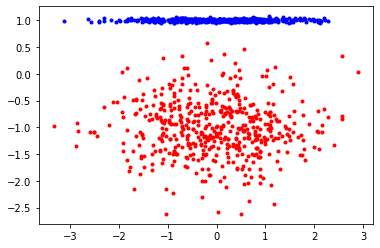

In [ ]:
X1, Y1, X2, Y2, train_set_x, train_set_y, test_set_x, test_set_y = generate_large_data()

In [ ]:
# Create the perceptron object
new_perceptron = Perceptron_Pytorch(2, learning_rate=0.001, batch_size=100);

In [ ]:
# Run for multiple epochs
new_perceptron.run_for_more_epochs(train_set_x, train_set_y, num_epochs=50000)

100%|██████████| 50000/50000 [00:27<00:00, 1834.67it/s]


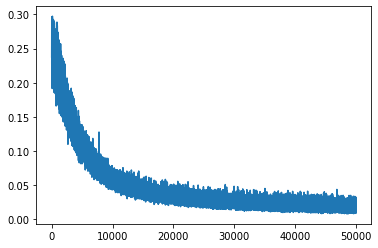

In [ ]:
# Visualize loss
y = new_perceptron.loss_data;
x = list(range(len(y)));
plt.plot(x, y)

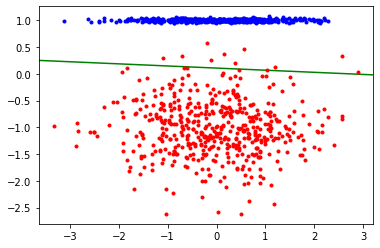

In [ ]:
# Visualize updated weights

W_new = new_perceptron.neuron.weight.detach().numpy()[0];
b_new = new_perceptron.neuron.bias.detach().numpy();

plt.axline([-b_new[0]/W_new[0], 0], slope=-W_new[0]/W_new[1], color='green')
plt.plot(X1[:, 0], X1[:, 1], 'r.')
plt.plot(X2[:, 0], X2[:, 1], 'b.')
plt.show()

# A better way of organizing your training code

There is a standard process usually followed when training a deep learning engine.

- First part
  - Download and arrange dataset
- Second part
  - Dataset sampler (Random sampling)
- Third part
  - Model creation
- Fourth part
  - Training (Which has the old four steps)
    - Run the inference on sampled batch
    - Compute loss
    - Calculate backpropagation weights
    - Backpropagate weights

In [ ]:
# Now lets separate it into three parts, data setup and sampling, model creation, and training
# This is done to make sure we have a clean code

In [ ]:
import os
import numpy as np
import torch
from torch import nn, optim

In [ ]:
# First part
# Download and arrange dataset

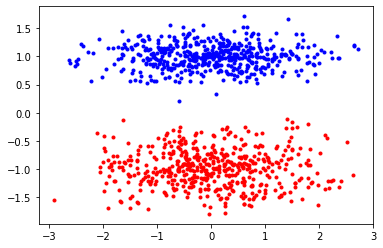

In [ ]:
X1, Y1, X2, Y2, train_set_x, train_set_y, test_set_x, test_set_y = generate_large_data()

In [ ]:
# Second part
# Create a function which randomly samples a batch from the entire dataset

In [ ]:
def random_sampler(input_vecs, target_vecs, batch_size=100):
    # Generate some random indices
    idx = np.random.randint(len(input_vecs), size=batch_size)

    # Random sample based on those indices
    input_vecs_sampled = input_vecs[idx,:]
    target_vecs_sampled = target_vecs[idx]

    return input_vecs_sampled, target_vecs_sampled;             

In [ ]:
# Third part
# Just model creation

In [ ]:
class My_Neural_Network(torch.nn.Module):
    def __init__(self, num_inputs=2):
        super(My_Neural_Network, self).__init__()
        self.num_inputs = num_inputs;

        # Create a layer, let's depend on the neurons' auto-initialization
        self.neuron = nn.Linear(self.num_inputs,1);

        # Create activation layer
        self.act = nn.Sigmoid() 


    def forward(self, input_vec):
        input_vec = torch.FloatTensor(input_vec)

        # define the flow
        self.y = self.neuron(input_vec);
        self.z = self.act(self.y);
        return self.z

In [ ]:
# Fourth part
# Function to train the model

Process
- Create a loss function
```
loss_calculator = torch.nn.MSELoss()
```

- Create an optimizer
```
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
```

- Start a loop for epoch
```
for i in tqdm(range(num_epochs)):
```

- Inside the loop

  - First reset all the backpropagation vectors
  ```
  optimizer.zero_grad()
  ```

  - Get the sampled training data
  ```
  input_vecs_sampled, target_vecs_sampled = random_sampler(input_vecs,
                                                          target_vecs,
                                                          batch_size=batch_size);
  ```

  - Generate all predictions
  ```
  all_predictions = model.forward(input_vecs_sampled);
  ```

  - Calculate Loss
  ```
  loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
  ```

  - Calculate backpropagation vector
  ```
  loss.backward()
  ```

  - Backpropagate (update) the weights
  ```
  optimizer.step()
  ```

In [ ]:
# Define a training functions
from tqdm import tqdm

def train_the_model(model, input_vecs, target_vecs, 
                    learning_rate=0.01, num_epochs=100,  batch_size=100):
    loss_calculator = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    loss_data = [];

    for i in tqdm(range(num_epochs)):
        # Reset optimizer old gradients
        optimizer.zero_grad()

        # Sample data
        input_vecs_sampled, target_vecs_sampled = random_sampler(input_vecs,
                                                          target_vecs,
                                                          batch_size=batch_size);
        
        # Forward
        all_predictions = model.forward(input_vecs_sampled);

        # Loss function
        loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
        loss_data.append(loss.item())

        # Calculate backpropagation
        loss.backward()

        # Backpropagate weights
        optimizer.step()

    return model, loss_data;

In [ ]:
# Actual process

In [ ]:
my_model = My_Neural_Network(num_inputs=2);

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_set_x, train_set_y,
                                           learning_rate=0.001, num_epochs=100000,  batch_size=100)

100%|██████████| 100000/100000 [00:54<00:00, 1850.48it/s]


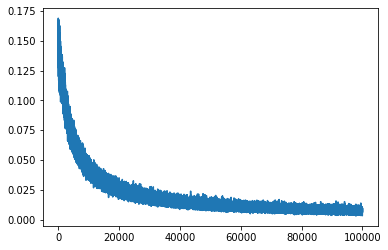

In [ ]:
# Visualize loss
y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

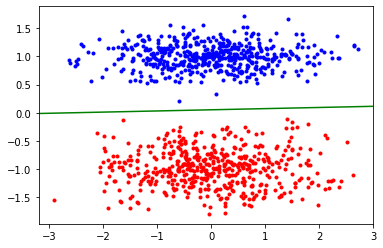

In [ ]:
W_new = my_model.neuron.weight.detach().numpy()[0];
b_new = my_model.neuron.bias.detach().numpy();

plt.axline([-b_new[0]/W_new[0], 0], slope=-W_new[0]/W_new[1], color='green')
plt.plot(X1[:, 0], X1[:, 1], 'r.')
plt.plot(X2[:, 0], X2[:, 1], 'b.')
plt.show()

In [ ]:
# Understand the model with torch summary

In [ ]:
from torchsummary import summary

# Use summary to print the layer details. 
# (1, 2) is input shape, 
# 1: the number of inputs going at once
# 2: the quantity of input variables
print(summary(my_model, (1, 2))) 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               3
           Sigmoid-2                 [-1, 1, 1]               0
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [ ]:
# Total number of parameters - 3
# 2 weights and 1 bias

# Multi-Layer perceptrons using Torch

A MLP can have a single layer with multiple neurons, or have multiple layers each having many neurons.

We also change our approach a bit, in mlp we will now keep the output layer have the number of neurons equal to number of classes. 

Every neuron works for its designated class, telling the probability of the input being from that class. 

Say, you have two classes, cats and dogs. Your output layer will have two neurons, one for cat and one for dog. If the input is an image of a dog, the neuron representing dog will give better output.

In [ ]:
# Lets change our approach
# Instead of a single perceptron, lets have number of neurons as the number of outputs
# Say its a cat vs dog classifier, one neuron predicts the probability of it being a cat 
# Other neuron predicts the probability of dog

In [ ]:
# Lets take up our three step process

In [ ]:
# First part

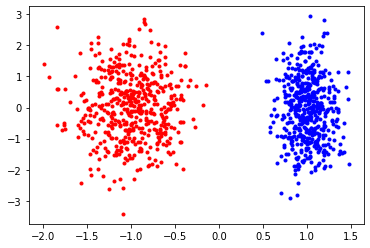

In [ ]:
X1, Y1, X2, Y2, train_set_x, train_set_y, test_set_x, test_set_y = generate_large_data()

In [ ]:
# Second part

We will introduce something called as one hot encoding. When you see the target labels, they are like 0, 1, 2, 3, ..... or dog, cat, horse, rabbit, ..... etc.

But our neurons present probability? How do we convert these labels to something a mlp can understand.

For example you have 4 images with classes 1, 2, 3, 4, each. So you will have 4 output neurons, and each label will be
- 0 -> [1, 0, 0, 0]
- 1 -> [0, 1, 0, 0]
- 2 -> [0, 0, 1, 0]
- 3 -> [0, 0, 0, 1]

This is one hot encoding!!!!

In [ ]:
# One hot encoding!!

In [ ]:
def random_sampler(input_vecs, target_vecs, batch_size=100, num_classes=2):
    idx = np.random.randint(len(input_vecs), size=batch_size)
    input_vecs_sampled = input_vecs[idx,:]
    target_vecs_sampled = target_vecs[idx]

    # This creates the one hot encoding
    target_vecs_sampled = np.eye(num_classes)[target_vecs_sampled]

    return input_vecs_sampled, target_vecs_sampled;             

In [ ]:
x, y = random_sampler(train_set_x, train_set_y, batch_size=3, num_classes=2);

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# Third part

How can you create a multi-layer feedforward network?

First lets start with a multi-perceptron layer, a single layer having more than 1 neuron, in this case its two neurons

In [ ]:
class My_Neural_Network(torch.nn.Module):
    def __init__(self, num_inputs=2, num_outputs=2):
        super(My_Neural_Network, self).__init__()
        self.num_inputs = num_inputs;
        self.num_outputs = num_outputs;

        # Create a layer, let's depend on the neurons' auto-initialization
        self.neuron = nn.Linear(self.num_inputs, self.num_outputs);

        # Create activation layer
        self.act = nn.Sigmoid() 


    def forward(self, input_vec):
        input_vec = torch.FloatTensor(input_vec)

        # define the flow
        self.y = self.neuron(input_vec);
        self.z = self.act(self.y);
        return self.z

In [ ]:
my_model = My_Neural_Network(num_inputs=2, num_outputs=2);

In [ ]:
from torchsummary import summary

# Use summary to print the layer details. 
# (1, 2) is input shape, 
# 1: the number of inputs going at once
# 2: the quantity of input variables
print(summary(my_model, (1, 2))) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 2]               6
           Sigmoid-2                 [-1, 1, 2]               0
Total params: 6
Trainable params: 6
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [ ]:
# Here there are 2 neurons, 2 weights and 1 bias for each. This 6 parameters

In [ ]:
# Fourth part

In [ ]:
# Define a training functions
from tqdm import tqdm

def train_the_model(model, input_vecs, target_vecs, 
                    learning_rate=0.01, num_epochs=100,  
                    batch_size=100, num_classes=2):
    loss_calculator = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    loss_data = [];

    for i in tqdm(range(num_epochs)):
        # Reset optimizer old gradients
        optimizer.zero_grad()

        # Sample data
        input_vecs_sampled, target_vecs_sampled = random_sampler(input_vecs,
                                                          target_vecs,
                                                          batch_size=batch_size,
                                                          num_classes=num_classes);
        
        # Forward
        all_predictions = model.forward(input_vecs_sampled);

        # Loss function
        loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
        loss_data.append(loss.item())

        # Calculate backpropagation
        loss.backward()

        # Backpropagate weights
        optimizer.step()

    return model, loss_data;

In [ ]:
my_model = My_Neural_Network(num_inputs=2, num_outputs=2);

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_set_x, train_set_y,
                                           learning_rate=0.001, num_epochs=100000,  
                                           batch_size=100, num_classes=2)

100%|██████████| 100000/100000 [00:59<00:00, 1693.99it/s]


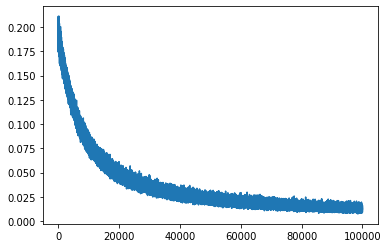

In [ ]:
# Visualize loss
y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# So now you cannot have a line depicting the separation
# You need a fifth part
# Which will do the inference and find accuracy on entire test set. 

In [ ]:
# Fifth Part

When you infer on an image it will predict 2 probabilities in this case, each neuron predicting what's the probability of the corresponding class. 

You use torch.argmax() function to see which neuron has the maximum probability and that is the predicted class. 

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    
    # Lets use what we learnt in previous part
    # argmax
    predicted_class = torch.argmax(out);
    return predicted_class.item();

In [ ]:
predicted_class = infer_on_data(trained_model, test_set_x[0]);
predicted_class

1

To check the accuracy we need to match prediction on every image with the actual class. 

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_set_x, test_set_y);
accuracy

100%|██████████| 50/50 [00:00<00:00, 4936.22it/s]


100.0

# DEMO - Digit Recognition

This is your first classifier that you will train. The goal is to detect whether what number the image is. 

![](https://drive.google.com/uc?export=view&id=1CWtLQajWKLxjek-9vMK20qVUUaNOV9l0)

Every image has its label written on it. Our goal is to train a MLP classifier that can do that. 

This is mnist dataset taken from http://yann.lecun.com/exdb/mnist/. Keras website mentions, "Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,  which is a derivative work from original NIST datasets. MNIST dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license."



In [ ]:
# First Part

In [ ]:
# Download training dataset

In [ ]:
! wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
! wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2022-02-08 10:41:47--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2022-02-08 10:41:47 (87.2 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-02-08 10:41:47--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[=========

In [ ]:
# Download test dataset

In [ ]:
! wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
! wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2022-02-08 10:41:51--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648877 (1.6M) [application/x-gzip]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   1.57M  --.-KB/s    in 0.07s   

2022-02-08 10:41:51 (23.6 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [1648877/1648877]

--2022-02-08 10:41:51--  http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4542 (4.4K) [application/x-gzip]
Saving to: ‘t10k-labels-idx1-ubyte.gz’

t10k-labels-idx1-ub 100%[==============

In [ ]:
# You need this library python-mnist to read the downloaded image

In [ ]:
! pip install python-mnist
# License for python-mnist: https://github.com/sorki/python-mnist/blob/master/LICENSE

In [ ]:
from mnist import MNIST
mndata = MNIST('.')
mndata.gz = True
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [ ]:
print("Total training images: {}".format(len(train_images)));
print("Total testing images: {}".format(len(test_images)));

Total training images: 60000
Total testing images: 10000


In [ ]:
# In this format each image is put as a single 1D vector, rather than a 2D vector
# Each vector has 784 data points

In [ ]:
# Using this function you can convert the 1D vector to 2D and visualize the images

In [ ]:
def convert_to_img(vec):
    img = vec.reshape((28,28))
    return img;

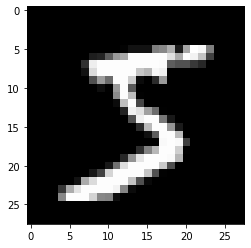

In [ ]:
from matplotlib import pyplot as plt

img = convert_to_img(np.array(train_images[0]));
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Convert the extracted list to numpy array

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

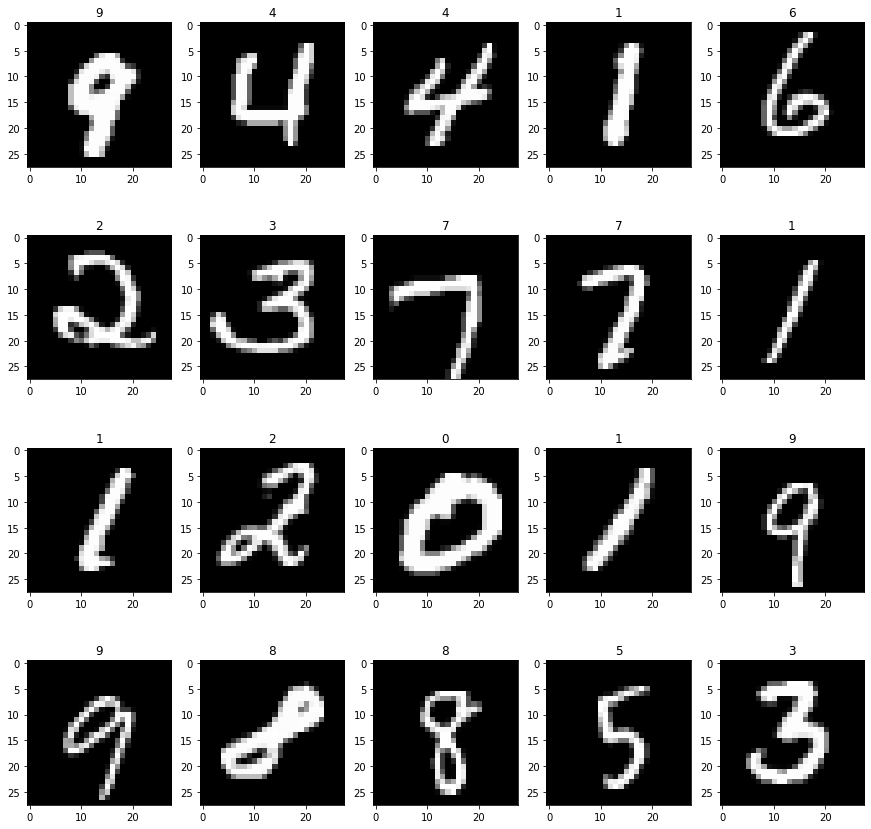

In [ ]:
from matplotlib import pyplot as plt

idx = np.random.randint(len(train_images), size=20)

f = plt.figure(figsize=(15,15))

for i in range(len(idx)):
    img = convert_to_img(np.array(train_images[idx[i]]));
    label = str(train_labels[idx[i]])

    f.add_subplot(4, 5, i+1).set_title(label);
    plt.imshow(img, cmap='gray');

plt.show()

In [ ]:
# Second part
# Dataset sampler 

In [ ]:
def random_sampler(input_vecs, target_vecs, batch_size=100, num_classes=2):
    idx = np.random.randint(len(input_vecs), size=batch_size)
    input_vecs_sampled = input_vecs[idx, :]
    target_vecs_sampled = target_vecs[idx]

    target_vecs_sampled = np.eye(num_classes)[target_vecs_sampled]

    return input_vecs_sampled, target_vecs_sampled;             

In [ ]:
x, y = random_sampler(train_images, train_labels, batch_size=3, num_classes=10);

In [ ]:
# The number of images selected is 3
# The shape of every data is (1, 784)
# That is why the entire data has size (3, 784)

# The shape of every label is (1, 10)
# That is why the entire data has size (3, 10)

In [ ]:
x.shape, y.shape

((3, 784), (3, 10))

In [ ]:
# One hot encoded label
y

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# Third part

Lets create a neural network which has 3 layers
- Input has 784 neurons
- One hidden layer with 350 neurons
- One output layer with 10 neurons (10 classes)

First create the hidden layer
```
# 784 inputs
# 350 outputs
self.layer1 = nn.Linear(784, 350);
```

Create first signoid object
```
self.act1 = nn.Sigmoid();
```

Second create the output layer
```
self.layer2 = nn.Linear(350, 10);
```

And the final activation layer
```
self.act2 = nn.Sigmoid();
```

Finally you connect it as

input -> layer1 -> act1 -> layer2 -> act2 -> output


```
out = self.layer1(input_vec);
out = self.act1(out);

out = self.layer2(out);
out = self.act2(out);
```

In [ ]:
# Input layer - 784 neurons
# Hidden layer 1 - 350 neurons
# Output layer - 10 neurons as there are 10 classes

class Classify_Mnist(torch.nn.Module):
    def __init__(self):
        super(Classify_Mnist, self).__init__()
        self.num_inputs = 784;
        self.num_outputs = 10;

        self.layer1 = nn.Linear(784, 350);
        self.act1 = nn.Sigmoid();

        self.layer2 = nn.Linear(350, 10);
        self.act2 = nn.Sigmoid();

    def forward(self, input_vec):
        input_vec = torch.FloatTensor(input_vec)

        # define the flow
        out = self.layer1(input_vec);
        out = self.act1(out);
        
        out = self.layer2(out);
        out = self.act2(out);

        return out;

In [ ]:
my_model = Classify_Mnist();

In [ ]:
from torchsummary import summary

print(summary(my_model, (1, 784)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 350]         274,750
           Sigmoid-2               [-1, 1, 350]               0
            Linear-3                [-1, 1, 10]           3,510
           Sigmoid-4                [-1, 1, 10]               0
Total params: 278,260
Trainable params: 278,260
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.06
Estimated Total Size (MB): 1.07
----------------------------------------------------------------
None


In [ ]:
# Hidden layer has 784 inputs and 350 neurons. 
num_weights_first_layer = 784*350;
num_bias_first_layer = 350;

# Second (output) layer has 350 inputs and 10 neurons
num_weights_second_layer = 350*10;
num_bias_second_layer = 10;

print("Total: ", num_weights_first_layer+num_bias_first_layer+num_weights_second_layer+num_bias_second_layer)

Total:  278260


In [ ]:
# Fourth part

In [ ]:
# Define a training functions
from tqdm import tqdm

def train_the_model(model, input_vecs, target_vecs, 
                    learning_rate=0.01, num_epochs=100,  
                    batch_size=100, num_classes=2):
    loss_calculator = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    loss_data = [];

    for i in tqdm(range(num_epochs)):
        # Reset optimizer old gradients
        optimizer.zero_grad()

        # Sample data
        input_vecs_sampled, target_vecs_sampled = random_sampler(input_vecs,
                                                          target_vecs,
                                                          batch_size=batch_size,
                                                          num_classes=num_classes);
        
        # Forward
        all_predictions = model.forward(input_vecs_sampled);

        # Loss function
        loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
        loss_data.append(loss.item())

        # Calculate backpropagation
        loss.backward()

        # Backpropagate weights
        optimizer.step()

    return model, loss_data;

## Attempt 1

In [ ]:
my_model = Classify_Mnist();

In [ ]:
# Experiment 1
# Training with lr=0.001, num_epochs=1000, batch_size=100

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_images, train_labels,
                                           learning_rate=0.001, num_epochs=1000,  
                                           batch_size=100, num_classes=10)

100%|██████████| 1000/1000 [00:07<00:00, 137.34it/s]


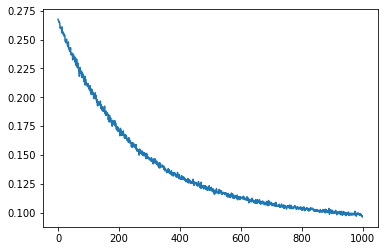

In [ ]:
# Visualize loss
from matplotlib import pyplot as plt

y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# Fifth Part

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);

    # We have 10 neurons, we find which neuron is giving the maximum the probability
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


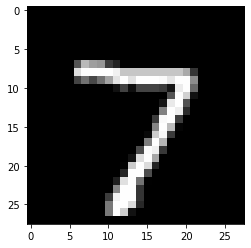

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 6, Actual class: 0


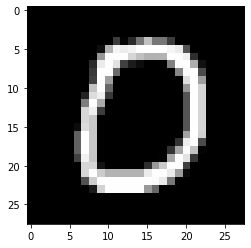

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4206.54it/s]


22.48

In [ ]:
# Experiment 1
# Training with lr=0.001, num_epochs=1000, batch_size=100
# Accuracy is 22.48 %

In [ ]:
# Thats a very low accuracy!!!!!!!!

## Attempt 2

Lets run it for more epochs and check?

In [ ]:
my_model = Classify_Mnist();

In [ ]:
# Experiment 2
# Training with lr=0.001, num_epochs=100000, batch_size=100

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_images, train_labels,
                                           learning_rate=0.001, num_epochs=100000,  
                                           batch_size=100, num_classes=10)

100%|██████████| 100000/100000 [12:23<00:00, 134.53it/s]


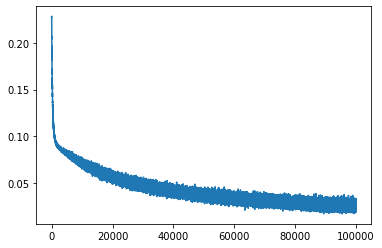

In [ ]:
# Visualize loss
from matplotlib import pyplot as plt

y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# Fifth part

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


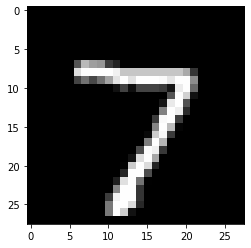

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 0, Actual class: 0


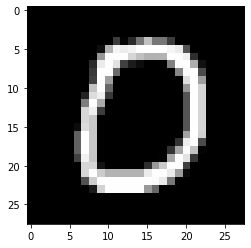

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4253.46it/s]


89.57000000000001

In [ ]:
# Experiment 2
# Training with lr=0.001, num_epochs=100000, batch_size=100
# Accuracy is 89.57 %
# Updated accuracy is quite better

In [ ]:
# Introducing Class based accuracies

In [ ]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [ ]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4281.45it/s]


{'0': 97.44897959183673,
 '1': 98.32599118942731,
 '2': 86.53100775193798,
 '3': 88.71287128712872,
 '4': 92.87169042769857,
 '5': 77.91479820627802,
 '6': 93.52818371607515,
 '7': 89.78599221789884,
 '8': 83.3675564681725,
 '9': 85.13379583746283}

## Attempt 3

What if we change the learning rate?

In [ ]:
# Increase the learning rate?

In [ ]:
my_model = Classify_Mnist();

In [ ]:
# Experiment 3
# Training with lr=0.1, num_epochs=100000, batch_size=100

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_images, train_labels,
                                           learning_rate=0.1, num_epochs=100000,  
                                           batch_size=100, num_classes=10)

100%|██████████| 100000/100000 [15:37<00:00, 106.64it/s]


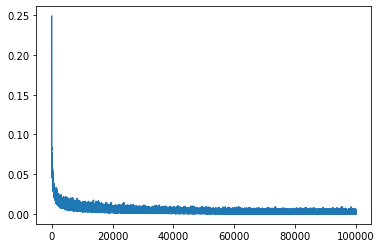

In [ ]:
# Visualize loss
from matplotlib import pyplot as plt

y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# Fifth part

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


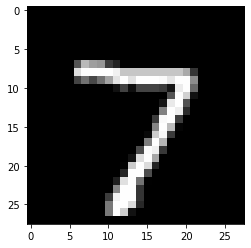

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 0, Actual class: 0


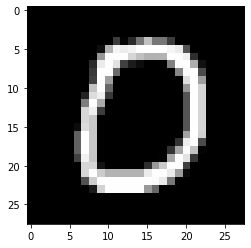

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4322.32it/s]


96.15

In [ ]:
# Experiment 3
# Training with lr=0.1, num_epochs=100000, batch_size=100
# Accuracy is 96.15 %
# Updated accuracy is quite better
# Buts its rarely adviced to have learning rate that high!!!

In [ ]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [ ]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4220.92it/s]


{'0': 98.9795918367347,
 '1': 98.85462555066078,
 '2': 95.73643410852713,
 '3': 95.74257425742574,
 '4': 96.13034623217924,
 '5': 94.50672645739911,
 '6': 96.3465553235908,
 '7': 95.3307392996109,
 '8': 95.17453798767967,
 '9': 94.25173439048564}

## Attempt 4

Decrease the batch size and increase the num of epochs

In [ ]:
my_model = Classify_Mnist();

In [ ]:
# Experiment 4
# Training with lr=0.1, num_epochs=500000, batch_size=10

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_images, train_labels,
                                           learning_rate=0.1, num_epochs=500000,  
                                           batch_size=10, num_classes=10)

100%|██████████| 500000/500000 [16:26<00:00, 507.01it/s]


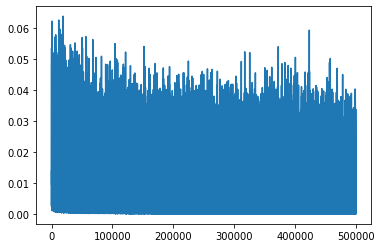

In [ ]:
# Visualize loss
from matplotlib import pyplot as plt

y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# Loss curve looks weird but lets look at the inferences
# We will look at better way of calculating and plotting loss in next parts

In [ ]:
# Fifth part

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


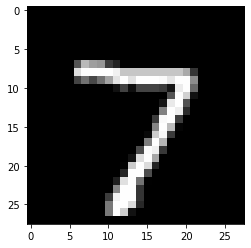

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 0, Actual class: 0


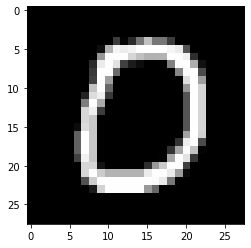

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4149.70it/s]


96.84

In [ ]:
# Experiment 4
# Training with lr=0.1, num_epochs=500000, batch_size=10
# Accuracy is 96.84 %
# Updated accuracy is quite better

In [ ]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [ ]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4184.07it/s]


{'0': 98.9795918367347,
 '1': 98.6784140969163,
 '2': 97.28682170542635,
 '3': 96.03960396039604,
 '4': 97.14867617107943,
 '5': 95.4035874439462,
 '6': 97.91231732776617,
 '7': 95.42801556420234,
 '8': 96.61190965092402,
 '9': 94.64816650148661}

## Attempt 5

What if we normalize the image between 0 and 1. 

In [ ]:
# Input layer - 784 neurons
# Hidden layer 1 - 350 neurons
# Output layer - 10 neurons as there are 10 classes

class Classify_Mnist_Normal(torch.nn.Module):
    def __init__(self):
        super(Classify_Mnist_Normal, self).__init__()
        self.num_inputs = 784;
        self.num_outputs = 10;

        self.layer1 = nn.Linear(784, 350);
        self.act1 = nn.Sigmoid();

        self.layer2 = nn.Linear(350, 10);
        self.act2 = nn.Sigmoid();

    def forward(self, input_vec):
        input_vec = torch.FloatTensor(input_vec/256.0)

        # define the flow
        out = self.layer1(input_vec);
        out = self.act1(out);
        
        out = self.layer2(out);
        out = self.act2(out);

        return out;

In [ ]:
my_model = Classify_Mnist_Normal();

In [ ]:
# Experiment 5
# Training with lr=0.1, num_epochs=500000, batch_size=10
# Normalize the input

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_images, train_labels,
                                           learning_rate=0.1, num_epochs=500000,  
                                           batch_size=10, num_classes=10)

100%|██████████| 500000/500000 [14:20<00:00, 581.10it/s]


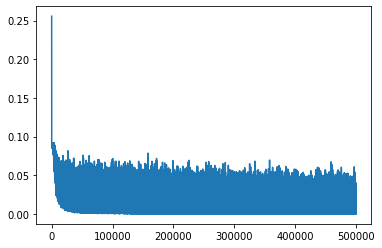

In [ ]:
# Visualize loss
from matplotlib import pyplot as plt

y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# Loss curve still looks weird
# We will look at better way of calculating and plotting loss in next parts

In [ ]:
# Fifth part

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


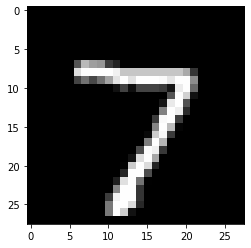

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 0, Actual class: 0


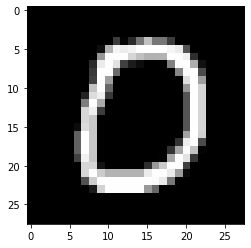

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4071.95it/s]


95.33

In [ ]:
# Experiment 5
# Training with lr=0.1, num_epochs=500000, batch_size=10
# Input normalized to 0 and 1
# Accuracy is 95.33 %
# Accuracy lowered
# So lets not go for normalization for these layers

In [ ]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [ ]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4208.38it/s]


{'0': 98.26530612244898,
 '1': 98.06167400881057,
 '2': 95.05813953488372,
 '3': 95.24752475247524,
 '4': 95.01018329938901,
 '5': 92.71300448430493,
 '6': 95.51148225469728,
 '7': 94.16342412451361,
 '8': 95.58521560574948,
 '9': 93.1615460852329}

## Attempt 6

Lets have a neural network where depth can be increased!!!!!!! Now we are moving a step towards deep learning!!!!!!

Lets make things interesting. Instead of having layers declared one by one we can create a network where we have list of layers. Dynamically added!!!

```
def __init__(self, num_inputs=784, hidden_layers=(10, 5), num_outputs=10):
```

- Inputs are 784 sized
- The number of elements in the tuple mention the number of hidden layers
  - hidden_layers=(10, 5) means two hidden layers, each having 10 and 5 neurons. 
- And the output layer still has 10 neurons

You create a list of neurons every layer had
```
num_perceptrons_list = [self.num_inputs] + list(self.hidden_layers) + [self.num_outputs];
```

And for every list you create layers and add a activation function next to it
```
for i in range(len(num_perceptrons_list)-1):
    layer = nn.Linear(num_perceptrons_list[i], num_perceptrons_list[i+1]);
    self.layers.append(layer);
    activation = nn.Sigmoid();
    self.layers.append(activation);
```

Since its a list the module will not be able to find the parameters. For that you need to add
```
self.layers = nn.ModuleList(self.layers);
```


In [ ]:
class Classify_Mnist_Deep(torch.nn.Module):
    def __init__(self, num_inputs=784, hidden_layers=(10, 5), num_outputs=10):
        super(Classify_Mnist_Deep, self).__init__()
        self.num_inputs = num_inputs;
        self.hidden_layers = hidden_layers;
        self.num_outputs = num_outputs;


        self.layers = []
        if(len(hidden_layers) == 0):
            layer = nn.Linear(self.num_inputs, self.num_outputs);
            self.layers.append(layer)
            activation = nn.Sigmoid()
            self.layers.append(activation)
        else:
            num_perceptrons_list = [self.num_inputs] + list(self.hidden_layers) + [self.num_outputs];
            for i in range(len(num_perceptrons_list)-1):
                layer = nn.Linear(num_perceptrons_list[i], num_perceptrons_list[i+1]);
                self.layers.append(layer);
                activation = nn.Sigmoid();
                self.layers.append(activation);

        self.layers = nn.ModuleList(self.layers);

    def forward(self, input_vec):
        # Newly added
        out = torch.FloatTensor(input_vec)

        for i in range(len(self.layers)):
            out = self.layers[i](out)

        return out

In [ ]:
my_model = Classify_Mnist_Deep(num_inputs=784, hidden_layers=(500, 300), num_outputs=10);

In [ ]:
from torchsummary import summary

print(summary(my_model, (1, 784)))

In [ ]:
# Experiment 6
# Training with lr=0.1, num_epochs=500000, batch_size=10
# Deeper Network

In [ ]:
trained_model, loss_data = train_the_model(my_model, train_images, train_labels,
                                           learning_rate=0.1, num_epochs=500000,  
                                           batch_size=10, num_classes=10)

100%|██████████| 500000/500000 [24:28<00:00, 340.37it/s]


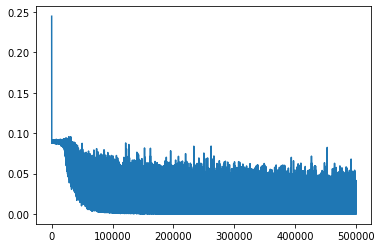

In [ ]:
# Visualize loss
from matplotlib import pyplot as plt

y = loss_data;
x = list(range(len(y)));
plt.plot(x, y)

In [ ]:
# Fifth part

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


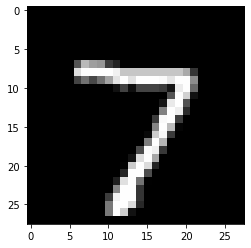

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 0, Actual class: 0


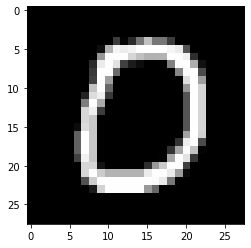

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2530.71it/s]


94.5

In [ ]:
# Experiment 6
# Training with lr=0.1, num_epochs=500000, batch_size=10
# Increased depth of network
# Accuracy is 94.5 %
# Accuracy lowered
# The crux being, just because we can deepen the network it does not mean it will increase the accuracy

In [ ]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [ ]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2557.82it/s]


{'0': 97.95918367346938,
 '1': 97.79735682819384,
 '2': 92.82945736434108,
 '3': 93.66336633663367,
 '4': 93.9918533604888,
 '5': 90.02242152466367,
 '6': 95.92901878914405,
 '7': 94.55252918287937,
 '8': 94.25051334702259,
 '9': 93.26065411298316}

A Summary of all the attempts made!!!!

A note to the reader: Always value your test accuracy more than the training accuracy. 


- Attempt 1
  -  ![](https://drive.google.com/uc?export=view&id=14SDZmYcNuxWfw2QDgXaFyS8KqB3oxl08)
  - ![](https://drive.google.com/uc?export=view&id=1nFyHAeP10rXP_BtD6BQj_vE9LyAroF7m)
  - When learning rate is low and the number of epochs used are less it had lesser accuracy

- Attempt 2
  - Increasing the number of epochs to train it further
  - ![](https://drive.google.com/uc?export=view&id=1piBdXs1WHtyHq6YxxYOwuo4uVMxIxrsv)
  - ![](https://drive.google.com/uc?export=view&id=1h94OR2WT4CTP17iGZPY-oJq-hG6Nhtl6)  
  - The loss went lower than 0.1 to 0.01


- Attempt 3
  - ![](https://drive.google.com/uc?export=view&id=1LwFiAjrA8hqaNrMzrrWU5VwWFKvxXu0_)
  - ![](https://drive.google.com/uc?export=view&id=1THnNpqwNkA5rpUzs7o8Gc6b79ckBW2GE)  
  - Increased the learning rate heavily and noticed that the test accuracy improved to somewhere 96%


- Attempt 4
  - ![](https://drive.google.com/uc?export=view&id=1STNdiI9LPysfY2cTqgtLO6DoHI-XRR_x)
  - We reduce the batch size and increase the number of epochs five times
  - It increased the accuracy from 96.15% to 96.84%


- Attempt 5
  - We try to normalize the input
  - ![](https://drive.google.com/uc?export=view&id=15fXnmn3e3-yXUAnfpBIakhVERl7OTR7X)
  - ![](https://drive.google.com/uc?export=view&id=1kUiZHBSYL9_WnuQ1Sig9lb8WzbiY1jXQ)  
  - And noticed that the accuracy decreased


- Attempt 6
  - We try to increase the depth of network by introducing multiple hidden layers
  - ![](https://drive.google.com/uc?export=view&id=1E3CJ4rDs8mjvD4WgNesILVBd9CHFBO-E)
  - ![](https://drive.google.com/uc?export=view&id=11fNzbAd-Xrv3FIXBT1HOWxuNK2FHKMmR) 
  - Increasing the depth doesn't increase the accuracy everytime


# Cleaning up the entire process and reiterating everything step by step

- First part: Download data and arrange it
  - At this time we introduce the concept of data split.
  - We split the training data into two parts
  - Training set and validation set
  - Training set is the data the model learns on
  - Validation set is the data the model never sees but validates after a set of epochs run
- Second part: Create random samplers
- Third part: Define the model
- Fourth part: Defining the training process
- Fifth part: Run inference and test accuracies

A major part we need here is to save the trained model and use it later!!!!!!

Note: Validation data is kept to make sure the model isn't overfitting. Overfitting is when your model rote-learns the training data and doesn't perform on test data. It's like a student has rote learnt all the mathematics problems in the textbook, and the student is unable to solve any similar type of problem in the test paper!!!!

In [ ]:
torch# First part 
# Create train, validation and test dataset

from mnist import MNIST
mndata = MNIST('.')
mndata.gz = True
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()


In [ ]:
# split the dataset
# 50000 training images
# 10000 validation images

In [ ]:
from sklearn.utils import shuffle

train_images, train_labels = shuffle(train_images, train_labels)

val_images = train_images[50000:]
val_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print("No of training images: {}".format(len(train_images)));
print("No of validation images: {}".format(len(val_images)));
print("No of testing images: {}".format(len(test_images)));


No of training images: 50000
No of validation images: 10000
No of testing images: 10000


In [ ]:
# Second part

def random_sampler(input_vecs, target_vecs, batch_size=100, num_classes=2):
    idx = np.random.randint(len(input_vecs), size=batch_size)
    input_vecs_sampled = input_vecs[idx, :]
    target_vecs_sampled = target_vecs[idx]

    target_vecs_sampled = np.eye(num_classes)[target_vecs_sampled]

    return input_vecs_sampled, target_vecs_sampled;             

In [ ]:
# Third part

# Input layer - 784 neurons
# Dynamic hidden layers
# Output layer - 10 neurons as there are 10 classes

class Classify_Mnist(torch.nn.Module):
    def __init__(self, num_inputs=784, hidden_layers=(10, 5), num_outputs=10):
        super(Classify_Mnist, self).__init__()
        self.num_inputs = num_inputs;
        self.hidden_layers = hidden_layers;
        self.num_outputs = num_outputs;


        self.layers = []
        if(len(hidden_layers) == 0):
            layer = nn.Linear(self.num_inputs, self.num_outputs);
            self.layers.append(layer)
            activation = nn.Sigmoid()
            self.layers.append(activation)
        else:
            num_perceptrons_list = [self.num_inputs] + list(self.hidden_layers) + [self.num_outputs];
            for i in range(len(num_perceptrons_list)-1):
                layer = nn.Linear(num_perceptrons_list[i], num_perceptrons_list[i+1]);
                self.layers.append(layer);
                activation = nn.Sigmoid();
                self.layers.append(activation);

        self.layers = nn.ModuleList(self.layers);

    def forward(self, input_vec):
        # Newly added
        out = torch.FloatTensor(input_vec)

        for i in range(len(self.layers)):
            out = self.layers[i](out)

        return out

In [ ]:
# Fourth part

Here we need to introduce the concept of running validation after training some epochs

So, with training data we also need to pass validation data
```
train_the_model(model, train_input_vecs, train_target_vecs, 
                    val_input_vecs, val_target_vecs,
                    learning_rate=0.01, num_epochs=100,  
                    train_batch_size=100, val_batch_size=500,
                    num_classes=2, validation_after_n=50)
```

We also need to provide how many images go in training epoch and how many images we use for validation. 


Earlier we only stored training loss, now we also start storing training accuracy, validation loss, and validation accuracy
- For some epochs you sample training data, train on it
- Then for once you sample validation data and find loss and accuracy on it
- Then you go back to training


And based on the results from validation, if accuracy is more than before we save the model and call it the best model. 

In [ ]:
from tqdm import tqdm

# We need to add a system where after every n-iteration/epoch 
# Validation loss and accuracy will be calculated

# introduce accuracy finding function
# We save model which had best validation accuracy

def train_the_model(model, train_input_vecs, train_target_vecs, 
                    val_input_vecs, val_target_vecs,
                    learning_rate=0.01, num_epochs=100,  
                    train_batch_size=100, val_batch_size=500,
                    num_classes=2, validation_after_n=50):
    loss_calculator = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    
    # training
    training_loss_data = [];
    training_accuracy_data = [];
    
    # validation
    validation_loss_data = [];
    validation_accuracy_data = [];

    best_validation_accuracy = 0;

    for i in tqdm(range(num_epochs)):
        ############################ THIS IS THE TRAINING PART ################################
        ############################ Same as before ###########################################
        # Sample data
        input_vecs_sampled, target_vecs_sampled = random_sampler(train_input_vecs,
                                                          train_target_vecs,
                                                          batch_size=train_batch_size,
                                                          num_classes=num_classes);
        
        # Forward
        all_predictions = model.forward(input_vecs_sampled);

        # Loss function
        loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
        training_loss_data.append(loss.item())

        # find training_batch_accuracy
        all_predictions = all_predictions.squeeze();
        accuracy = 0;
        for j in range(len(all_predictions)):
            predicted_class = torch.argmax(all_predictions[j]);
            actual_class = np.argmax(target_vecs_sampled[j]);
            if predicted_class == actual_class:
                accuracy += 1;
        training_accuracy_data.append(accuracy/len(all_predictions))

        # Make backprop parameters 0
        optimizer.zero_grad()

        # Calculate backpropagation
        loss.backward()

        # Backpropagate weights
        optimizer.step()
        #########################################################################################


        ############################ THIS IS THE Validation PART ################################
        # Perform validation after every specified epoch/iteration
        if(i%validation_after_n == 0):
            # Sample data
            input_vecs_sampled, target_vecs_sampled = random_sampler(val_input_vecs,
                                                              val_target_vecs,
                                                              batch_size=val_batch_size,
                                                              num_classes=num_classes);
            
            # Forward
            all_predictions = model.forward(input_vecs_sampled);

            all_predictions = all_predictions.squeeze();

            # Loss function
            loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
            validation_loss_data.append(loss.item())

            # find training_batch_accuracy
            accuracy = 0;
            for j in range(len(all_predictions)):
                predicted_class = torch.argmax(all_predictions[j]);
                actual_class = np.argmax(target_vecs_sampled[j]);
                if predicted_class == actual_class:
                    accuracy += 1;
            validation_accuracy_data.append(accuracy/len(all_predictions))

            print("\nEpoch: {}, train_acc: {}, val_acc: {}, train_loss: {}, val_loss: {}".format(
                i, training_accuracy_data[-1]*100, validation_accuracy_data[-1],
                training_loss_data[-1], validation_loss_data[-1]*100
            ))

            # Save the best model
            if best_validation_accuracy <= accuracy/len(all_predictions)*100:
                best_validation_accuracy = accuracy/len(all_predictions)*100;
                torch.save(model, "best.pt");
            
            torch.save(model, "latest.pt");
      ###################################################################################################

    return (model, training_loss_data, training_accuracy_data, validation_loss_data, validation_accuracy_data);

In [ ]:
my_model = Classify_Mnist(num_inputs=784, hidden_layers=(500, 300), num_outputs=10);

In [ ]:
output = train_the_model(my_model, train_images, train_labels,
                                           val_images, val_labels,
                                           learning_rate=0.1, num_epochs=1000000,  
                                           train_batch_size=8, val_batch_size=2000,
                                           num_classes=10, validation_after_n=10000)

  0%|          | 19/1000000 [00:00<6:30:48, 42.65it/s] 


Epoch: 0, train_acc: 0.0, val_acc: 0.0835, train_loss: 0.6829030513763428, val_loss: 56.24620318412781


  1%|          | 10028/1000000 [00:58<1:31:36, 180.12it/s]


Epoch: 10000, train_acc: 87.5, val_acc: 0.9125, train_loss: 0.10471753776073456, val_loss: 7.182083278894424


  2%|▏         | 20044/1000000 [01:43<1:16:03, 214.75it/s]


Epoch: 20000, train_acc: 100.0, val_acc: 0.888, train_loss: 0.045774154365062714, val_loss: 7.876112312078476


  3%|▎         | 30026/1000000 [02:23<1:25:05, 189.97it/s]


Epoch: 30000, train_acc: 87.5, val_acc: 0.898, train_loss: 0.08785347640514374, val_loss: 7.399027794599533


  4%|▍         | 40029/1000000 [03:02<1:33:21, 171.36it/s]


Epoch: 40000, train_acc: 87.5, val_acc: 0.895, train_loss: 0.06355420500040054, val_loss: 7.159742712974548


  5%|▌         | 50018/1000000 [03:42<1:50:16, 143.59it/s]


Epoch: 50000, train_acc: 100.0, val_acc: 0.896, train_loss: 0.041229717433452606, val_loss: 7.07087442278862


  6%|▌         | 60053/1000000 [04:22<1:10:29, 222.22it/s]


Epoch: 60000, train_acc: 100.0, val_acc: 0.894, train_loss: 0.05301738530397415, val_loss: 7.191135734319687


  7%|▋         | 70036/1000000 [05:01<1:18:35, 197.22it/s]


Epoch: 70000, train_acc: 100.0, val_acc: 0.8935, train_loss: 0.042500779032707214, val_loss: 6.836986541748047


  8%|▊         | 80047/1000000 [05:38<1:05:04, 235.60it/s]


Epoch: 80000, train_acc: 100.0, val_acc: 0.9225, train_loss: 0.027736162766814232, val_loss: 5.917767807841301


  9%|▉         | 90048/1000000 [06:15<59:49, 253.53it/s]  


Epoch: 90000, train_acc: 87.5, val_acc: 0.892, train_loss: 0.15419548749923706, val_loss: 7.038373500108719


 10%|█         | 100034/1000000 [06:55<1:06:21, 226.05it/s]


Epoch: 100000, train_acc: 100.0, val_acc: 0.9125, train_loss: 0.02273852750658989, val_loss: 5.764827877283096


 11%|█         | 110048/1000000 [07:33<1:00:53, 243.61it/s]


Epoch: 110000, train_acc: 75.0, val_acc: 0.9085, train_loss: 0.13470175862312317, val_loss: 6.130554154515266


 12%|█▏        | 120023/1000000 [08:08<1:15:55, 193.15it/s]


Epoch: 120000, train_acc: 100.0, val_acc: 0.9045, train_loss: 0.022584304213523865, val_loss: 6.222516298294067


 13%|█▎        | 130039/1000000 [08:46<1:16:31, 189.48it/s]


Epoch: 130000, train_acc: 87.5, val_acc: 0.9145, train_loss: 0.06921227276325226, val_loss: 5.547644197940826


 14%|█▍        | 140061/1000000 [09:24<54:10, 264.53it/s]


Epoch: 140000, train_acc: 87.5, val_acc: 0.914, train_loss: 0.059733182191848755, val_loss: 5.794103443622589


 15%|█▌        | 150048/1000000 [10:02<1:09:21, 204.22it/s]


Epoch: 150000, train_acc: 75.0, val_acc: 0.9105, train_loss: 0.15758174657821655, val_loss: 5.789608880877495


 16%|█▌        | 160049/1000000 [10:38<1:00:19, 232.03it/s]


Epoch: 160000, train_acc: 100.0, val_acc: 0.925, train_loss: 0.012702090665698051, val_loss: 5.3283751010894775


 17%|█▋        | 170046/1000000 [11:13<59:07, 233.95it/s]  


Epoch: 170000, train_acc: 75.0, val_acc: 0.9125, train_loss: 0.08250899612903595, val_loss: 5.296903848648071


 18%|█▊        | 180029/1000000 [11:49<1:03:40, 214.64it/s]


Epoch: 180000, train_acc: 100.0, val_acc: 0.92, train_loss: 0.010037963278591633, val_loss: 5.627099052071571


 19%|█▉        | 190029/1000000 [12:25<58:43, 229.89it/s]


Epoch: 190000, train_acc: 100.0, val_acc: 0.9125, train_loss: 0.05569521710276604, val_loss: 5.36985956132412


 20%|██        | 200041/1000000 [12:59<49:38, 268.58it/s]


Epoch: 200000, train_acc: 87.5, val_acc: 0.9205, train_loss: 0.04496551305055618, val_loss: 5.41071891784668


 21%|██        | 210066/1000000 [13:33<45:45, 287.74it/s]


Epoch: 210000, train_acc: 100.0, val_acc: 0.9135, train_loss: 0.015757430344820023, val_loss: 5.305569618940353


 22%|██▏       | 220028/1000000 [14:09<53:57, 240.92it/s]


Epoch: 220000, train_acc: 87.5, val_acc: 0.9285, train_loss: 0.040944624692201614, val_loss: 4.817377403378487


 23%|██▎       | 230033/1000000 [14:45<1:12:27, 177.09it/s]


Epoch: 230000, train_acc: 87.5, val_acc: 0.924, train_loss: 0.041580989956855774, val_loss: 4.512137919664383


 24%|██▍       | 240049/1000000 [15:21<56:58, 222.32it/s]


Epoch: 240000, train_acc: 87.5, val_acc: 0.9245, train_loss: 0.18510307371616364, val_loss: 4.8642598092556


 25%|██▌       | 250032/1000000 [15:58<1:00:48, 205.57it/s]


Epoch: 250000, train_acc: 87.5, val_acc: 0.9305, train_loss: 0.08308636397123337, val_loss: 4.417243227362633


 26%|██▌       | 260039/1000000 [16:32<44:02, 280.06it/s]


Epoch: 260000, train_acc: 87.5, val_acc: 0.9305, train_loss: 0.06151873618364334, val_loss: 4.668860882520676


 27%|██▋       | 270052/1000000 [17:03<44:13, 275.06it/s]


Epoch: 270000, train_acc: 87.5, val_acc: 0.931, train_loss: 0.023402493447065353, val_loss: 4.384321719408035


 28%|██▊       | 280035/1000000 [17:34<55:11, 217.43it/s]


Epoch: 280000, train_acc: 100.0, val_acc: 0.9205, train_loss: 0.010172272101044655, val_loss: 4.801306873559952


 29%|██▉       | 290046/1000000 [18:10<51:08, 231.35it/s]


Epoch: 290000, train_acc: 100.0, val_acc: 0.934, train_loss: 0.024341706186532974, val_loss: 4.186877608299255


 30%|███       | 300050/1000000 [18:44<43:03, 270.95it/s]


Epoch: 300000, train_acc: 100.0, val_acc: 0.9295, train_loss: 0.005473978351801634, val_loss: 4.229342564940453


 31%|███       | 310053/1000000 [19:20<44:33, 258.04it/s]


Epoch: 310000, train_acc: 100.0, val_acc: 0.92, train_loss: 0.04354757443070412, val_loss: 5.0553809851408005


 32%|███▏      | 320019/1000000 [19:56<1:12:03, 157.29it/s]


Epoch: 320000, train_acc: 100.0, val_acc: 0.9235, train_loss: 0.021334966644644737, val_loss: 4.341420531272888


 33%|███▎      | 330040/1000000 [20:31<45:03, 247.77it/s]


Epoch: 330000, train_acc: 75.0, val_acc: 0.9305, train_loss: 0.15076909959316254, val_loss: 4.150727763772011


 34%|███▍      | 340044/1000000 [21:05<38:25, 286.21it/s]


Epoch: 340000, train_acc: 87.5, val_acc: 0.9285, train_loss: 0.10115130990743637, val_loss: 4.601653292775154


 35%|███▌      | 350057/1000000 [21:39<39:11, 276.42it/s]


Epoch: 350000, train_acc: 100.0, val_acc: 0.918, train_loss: 0.004931488074362278, val_loss: 4.854365438222885


 36%|███▌      | 360048/1000000 [22:13<44:27, 239.87it/s]


Epoch: 360000, train_acc: 100.0, val_acc: 0.9255, train_loss: 0.023872237652540207, val_loss: 4.299702867865562


 37%|███▋      | 370041/1000000 [22:47<53:35, 195.92it/s]


Epoch: 370000, train_acc: 87.5, val_acc: 0.9245, train_loss: 0.04999566823244095, val_loss: 4.784153774380684


 38%|███▊      | 380038/1000000 [23:21<38:13, 270.28it/s]


Epoch: 380000, train_acc: 87.5, val_acc: 0.9315, train_loss: 0.032964952290058136, val_loss: 4.198547452688217


 39%|███▉      | 390032/1000000 [23:56<48:44, 208.55it/s]


Epoch: 390000, train_acc: 100.0, val_acc: 0.9475, train_loss: 0.010616391897201538, val_loss: 3.5218026489019394


 40%|████      | 400053/1000000 [24:31<36:21, 274.97it/s]


Epoch: 400000, train_acc: 100.0, val_acc: 0.934, train_loss: 0.019082406535744667, val_loss: 4.012538492679596


 41%|████      | 410038/1000000 [25:05<34:10, 287.69it/s]


Epoch: 410000, train_acc: 100.0, val_acc: 0.934, train_loss: 0.012125208042562008, val_loss: 4.120000824332237


 42%|████▏     | 420039/1000000 [25:40<36:37, 263.90it/s]


Epoch: 420000, train_acc: 100.0, val_acc: 0.938, train_loss: 0.029205525293946266, val_loss: 3.812945634126663


 43%|████▎     | 430060/1000000 [26:15<35:32, 267.25it/s]


Epoch: 430000, train_acc: 100.0, val_acc: 0.941, train_loss: 0.016536284238100052, val_loss: 3.746504709124565


 44%|████▍     | 440038/1000000 [26:48<40:43, 229.13it/s]


Epoch: 440000, train_acc: 100.0, val_acc: 0.933, train_loss: 0.03389953076839447, val_loss: 4.06697578728199


 45%|████▌     | 450050/1000000 [27:23<38:11, 240.00it/s]


Epoch: 450000, train_acc: 87.5, val_acc: 0.9305, train_loss: 0.07988204061985016, val_loss: 4.159823060035706


 46%|████▌     | 460049/1000000 [27:59<32:33, 276.38it/s]


Epoch: 460000, train_acc: 100.0, val_acc: 0.9455, train_loss: 0.016690468415617943, val_loss: 3.46175916492939


 47%|████▋     | 470027/1000000 [28:33<43:07, 204.84it/s]


Epoch: 470000, train_acc: 75.0, val_acc: 0.9385, train_loss: 0.06149895116686821, val_loss: 3.6766160279512405


 48%|████▊     | 480029/1000000 [29:09<38:22, 225.80it/s]


Epoch: 480000, train_acc: 87.5, val_acc: 0.9265, train_loss: 0.057522255927324295, val_loss: 4.177876189351082


 49%|████▉     | 490043/1000000 [29:43<34:25, 246.85it/s]


Epoch: 490000, train_acc: 87.5, val_acc: 0.9415, train_loss: 0.08015891909599304, val_loss: 3.6291297525167465


 50%|█████     | 500032/1000000 [30:17<33:58, 245.24it/s]


Epoch: 500000, train_acc: 87.5, val_acc: 0.9365, train_loss: 0.06486863642930984, val_loss: 3.9408717304468155


 51%|█████     | 510029/1000000 [30:53<50:13, 162.61it/s]


Epoch: 510000, train_acc: 75.0, val_acc: 0.9445, train_loss: 0.20423679053783417, val_loss: 3.7078455090522766


 52%|█████▏    | 520035/1000000 [31:25<31:58, 250.20it/s]


Epoch: 520000, train_acc: 87.5, val_acc: 0.9445, train_loss: 0.05035487934947014, val_loss: 3.6669984459877014


 53%|█████▎    | 530058/1000000 [32:01<29:27, 265.87it/s]


Epoch: 530000, train_acc: 100.0, val_acc: 0.9395, train_loss: 0.010676593519747257, val_loss: 3.6660216748714447


 54%|█████▍    | 540041/1000000 [32:35<30:47, 248.91it/s]


Epoch: 540000, train_acc: 100.0, val_acc: 0.944, train_loss: 0.0015981668839231133, val_loss: 3.658835217356682


 55%|█████▌    | 550041/1000000 [33:09<35:46, 209.60it/s]


Epoch: 550000, train_acc: 87.5, val_acc: 0.9285, train_loss: 0.033309515565633774, val_loss: 4.249845072627068


 56%|█████▌    | 560054/1000000 [33:40<28:01, 261.68it/s]


Epoch: 560000, train_acc: 100.0, val_acc: 0.9455, train_loss: 0.007813671603798866, val_loss: 3.792959451675415


 57%|█████▋    | 570030/1000000 [34:18<28:47, 248.85it/s]


Epoch: 570000, train_acc: 100.0, val_acc: 0.937, train_loss: 0.013612094335258007, val_loss: 3.8977012038230896


 58%|█████▊    | 580050/1000000 [34:54<29:13, 239.53it/s]


Epoch: 580000, train_acc: 87.5, val_acc: 0.9285, train_loss: 0.05171789601445198, val_loss: 4.180654138326645


 59%|█████▉    | 590065/1000000 [35:29<23:44, 287.87it/s]


Epoch: 590000, train_acc: 100.0, val_acc: 0.935, train_loss: 0.03314623609185219, val_loss: 4.033048450946808


 60%|██████    | 600037/1000000 [36:03<26:29, 251.67it/s]


Epoch: 600000, train_acc: 100.0, val_acc: 0.9395, train_loss: 0.023719988763332367, val_loss: 3.661036863923073


 61%|██████    | 610042/1000000 [36:39<29:05, 223.37it/s]


Epoch: 610000, train_acc: 75.0, val_acc: 0.9385, train_loss: 0.06283010542392731, val_loss: 3.6995738744735718


 62%|██████▏   | 620049/1000000 [37:14<26:50, 235.85it/s]


Epoch: 620000, train_acc: 100.0, val_acc: 0.9405, train_loss: 0.005340517498552799, val_loss: 3.3317629247903824


 63%|██████▎   | 630036/1000000 [37:45<21:52, 281.83it/s]


Epoch: 630000, train_acc: 87.5, val_acc: 0.9385, train_loss: 0.04747670143842697, val_loss: 3.72236929833889


 64%|██████▍   | 640055/1000000 [38:18<24:56, 240.54it/s]


Epoch: 640000, train_acc: 100.0, val_acc: 0.943, train_loss: 0.0153267290443182, val_loss: 3.453773632645607


 65%|██████▌   | 650028/1000000 [38:51<25:03, 232.75it/s]


Epoch: 650000, train_acc: 100.0, val_acc: 0.943, train_loss: 0.008484858088195324, val_loss: 3.658917173743248


 66%|██████▌   | 660049/1000000 [39:24<24:08, 234.69it/s]


Epoch: 660000, train_acc: 100.0, val_acc: 0.943, train_loss: 0.0034853913821280003, val_loss: 3.5877950489521027


 67%|██████▋   | 670037/1000000 [39:58<22:17, 246.64it/s]


Epoch: 670000, train_acc: 100.0, val_acc: 0.9455, train_loss: 0.02318323217332363, val_loss: 3.1349781900644302


 68%|██████▊   | 680045/1000000 [40:32<21:21, 249.61it/s]


Epoch: 680000, train_acc: 87.5, val_acc: 0.9295, train_loss: 0.043291397392749786, val_loss: 4.011953994631767


 69%|██████▉   | 690039/1000000 [41:10<20:34, 251.11it/s]


Epoch: 690000, train_acc: 87.5, val_acc: 0.9475, train_loss: 0.04034554585814476, val_loss: 3.051382675766945


 70%|███████   | 700060/1000000 [41:44<17:25, 286.85it/s]


Epoch: 700000, train_acc: 87.5, val_acc: 0.9455, train_loss: 0.0939135029911995, val_loss: 3.3485762774944305


 71%|███████   | 710044/1000000 [42:20<21:18, 226.85it/s]


Epoch: 710000, train_acc: 100.0, val_acc: 0.9425, train_loss: 0.010138483718037605, val_loss: 3.714478015899658


 72%|███████▏  | 720025/1000000 [42:54<25:24, 183.68it/s]


Epoch: 720000, train_acc: 100.0, val_acc: 0.946, train_loss: 0.002229386707767844, val_loss: 3.059234097599983


 73%|███████▎  | 730048/1000000 [43:27<21:15, 211.70it/s]


Epoch: 730000, train_acc: 100.0, val_acc: 0.949, train_loss: 0.006892666220664978, val_loss: 3.2386697828769684


 74%|███████▍  | 740039/1000000 [44:07<15:28, 279.89it/s]


Epoch: 740000, train_acc: 87.5, val_acc: 0.94, train_loss: 0.039772119373083115, val_loss: 3.765632212162018


 75%|███████▌  | 750050/1000000 [44:40<14:56, 278.96it/s]


Epoch: 750000, train_acc: 87.5, val_acc: 0.9475, train_loss: 0.042928051203489304, val_loss: 3.3739123493433


 76%|███████▌  | 760061/1000000 [45:15<14:49, 269.75it/s]


Epoch: 760000, train_acc: 87.5, val_acc: 0.9515, train_loss: 0.04824003949761391, val_loss: 3.204454481601715


 77%|███████▋  | 770055/1000000 [45:50<15:10, 252.57it/s]


Epoch: 770000, train_acc: 100.0, val_acc: 0.943, train_loss: 0.02121259644627571, val_loss: 3.7985995411872864


 78%|███████▊  | 780037/1000000 [46:23<13:56, 262.94it/s]


Epoch: 780000, train_acc: 100.0, val_acc: 0.956, train_loss: 0.01693836599588394, val_loss: 2.7823757380247116


 79%|███████▉  | 790055/1000000 [46:59<12:11, 286.94it/s]


Epoch: 790000, train_acc: 100.0, val_acc: 0.9405, train_loss: 0.0077128238044679165, val_loss: 3.589361160993576


 80%|████████  | 800060/1000000 [47:30<11:56, 279.00it/s]


Epoch: 800000, train_acc: 100.0, val_acc: 0.948, train_loss: 0.010330372489988804, val_loss: 3.406848758459091


 81%|████████  | 810043/1000000 [48:05<13:13, 239.53it/s]


Epoch: 810000, train_acc: 87.5, val_acc: 0.951, train_loss: 0.06412728130817413, val_loss: 3.026195615530014


 82%|████████▏ | 820025/1000000 [48:38<12:57, 231.49it/s]


Epoch: 820000, train_acc: 87.5, val_acc: 0.952, train_loss: 0.07340339571237564, val_loss: 3.1939100474119186


 83%|████████▎ | 830027/1000000 [49:15<11:14, 252.05it/s]


Epoch: 830000, train_acc: 87.5, val_acc: 0.9475, train_loss: 0.07490827143192291, val_loss: 3.1349968165159225


 84%|████████▍ | 840032/1000000 [49:49<10:22, 257.01it/s]


Epoch: 840000, train_acc: 62.5, val_acc: 0.943, train_loss: 0.14789727330207825, val_loss: 3.480817750096321


 85%|████████▌ | 850062/1000000 [50:22<08:31, 293.41it/s]


Epoch: 850000, train_acc: 100.0, val_acc: 0.946, train_loss: 0.029998620972037315, val_loss: 3.306632861495018


 86%|████████▌ | 860030/1000000 [50:56<10:07, 230.22it/s]


Epoch: 860000, train_acc: 100.0, val_acc: 0.9325, train_loss: 0.003740459680557251, val_loss: 4.181379824876785


 87%|████████▋ | 870051/1000000 [51:29<07:35, 285.28it/s]


Epoch: 870000, train_acc: 100.0, val_acc: 0.9545, train_loss: 0.005330648738890886, val_loss: 2.988024242222309


 88%|████████▊ | 880060/1000000 [52:01<07:37, 262.30it/s]


Epoch: 880000, train_acc: 100.0, val_acc: 0.9415, train_loss: 0.0013759039575234056, val_loss: 3.3171210438013077


 89%|████████▉ | 890063/1000000 [52:35<07:01, 260.76it/s]


Epoch: 890000, train_acc: 100.0, val_acc: 0.9465, train_loss: 0.015427635982632637, val_loss: 3.5192206501960754


 90%|█████████ | 900057/1000000 [53:08<05:59, 277.92it/s]


Epoch: 900000, train_acc: 100.0, val_acc: 0.9515, train_loss: 0.029420485720038414, val_loss: 2.859167195856571


 91%|█████████ | 910038/1000000 [53:41<05:22, 278.78it/s]


Epoch: 910000, train_acc: 87.5, val_acc: 0.942, train_loss: 0.04275251179933548, val_loss: 3.3796053379774094


 92%|█████████▏| 920029/1000000 [54:18<05:38, 235.96it/s]


Epoch: 920000, train_acc: 100.0, val_acc: 0.9465, train_loss: 0.00325724552385509, val_loss: 3.1434331089258194


 93%|█████████▎| 930031/1000000 [54:51<05:22, 216.97it/s]


Epoch: 930000, train_acc: 100.0, val_acc: 0.9375, train_loss: 0.002704017562791705, val_loss: 3.7038270384073257


 94%|█████████▍| 940040/1000000 [55:25<04:35, 218.03it/s]


Epoch: 940000, train_acc: 100.0, val_acc: 0.9445, train_loss: 0.015184042975306511, val_loss: 3.3279698342084885


 95%|█████████▌| 950031/1000000 [56:00<03:26, 241.51it/s]


Epoch: 950000, train_acc: 100.0, val_acc: 0.952, train_loss: 0.009808756411075592, val_loss: 2.7533501386642456


 96%|█████████▌| 960028/1000000 [56:34<03:07, 213.34it/s]


Epoch: 960000, train_acc: 100.0, val_acc: 0.9575, train_loss: 0.004108578898012638, val_loss: 2.7822820469737053


 97%|█████████▋| 970065/1000000 [57:11<01:50, 271.42it/s]


Epoch: 970000, train_acc: 100.0, val_acc: 0.948, train_loss: 0.020020706579089165, val_loss: 3.2210778445005417


 98%|█████████▊| 980020/1000000 [57:47<02:12, 150.46it/s]


Epoch: 980000, train_acc: 100.0, val_acc: 0.9485, train_loss: 0.008329999633133411, val_loss: 3.1469322741031647


 99%|█████████▉| 990027/1000000 [58:24<00:47, 208.67it/s]


Epoch: 990000, train_acc: 100.0, val_acc: 0.942, train_loss: 0.0035812787245959044, val_loss: 3.6454718559980392


100%|██████████| 1000000/1000000 [59:02<00:00, 282.27it/s]


In [ ]:
trained_model, training_loss_data, training_accuracy_data, validation_loss_data, validation_accuracy_data = output

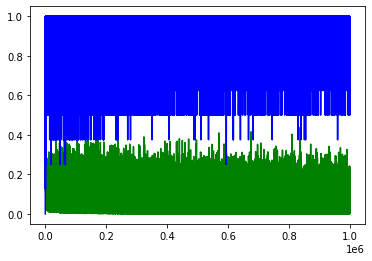

In [ ]:
# Visualize training loss and accuracy
from matplotlib import pyplot as plt


epochs = list(range(len(training_loss_data)))
plt.plot(epochs, training_loss_data, 'g', label='Training loss')
plt.plot(epochs, training_accuracy_data, 'b', label='Training accuracy')

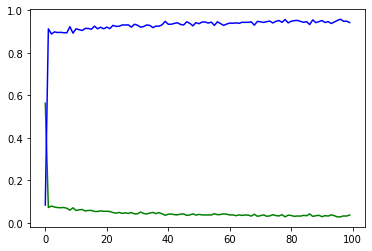

In [ ]:
# Visualize validation loss and accuracy
from matplotlib import pyplot as plt


epochs = list(range(len(validation_loss_data)))
plt.plot(epochs, validation_loss_data, 'g', label='Validation loss')
plt.plot(epochs, validation_accuracy_data, 'b', label='Validation accuracy')

In [ ]:
# prediction using latest model

In [ ]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 7, Actual class: 7


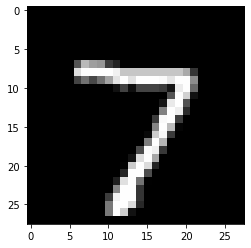

In [ ]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 0, Actual class: 0


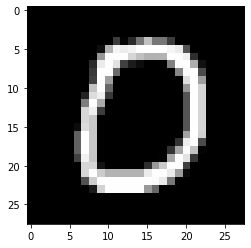

In [ ]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [ ]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [ ]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2893.22it/s]


94.98

In [ ]:
# Experiment 1
# Network with 2 hidden layers
# Train Images - 50000
# Validation Images - 10000
# Learning rate - 0.1
# num_epochs=1000000,  train_batch_size=8, val_batch_size=2000, validation_after_n=10000
# Accuracy is 94.98 %

In [ ]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [ ]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2842.65it/s]


{'0': 98.36734693877551,
 '1': 98.32599118942731,
 '2': 95.15503875968993,
 '3': 94.55445544554455,
 '4': 95.9266802443992,
 '5': 93.94618834080718,
 '6': 96.4509394572025,
 '7': 95.3307392996109,
 '8': 91.47843942505133,
 '9': 89.79187314172448}

A common approach used to train a model is that
- After base training you start changing one of the hyperparaters and keeping rest constant
- In this second experiment you use the trained model from previous experiment as the base model.
- If the accuracy increased, then this new model becomes the based model for the third experiment

In [ ]:
# Retraining with lower learning rate

In [ ]:
# Keeping the trained model from first experiment 

In [ ]:
output = train_the_model(trained_model, train_images, train_labels,
                                           val_images, val_labels,
                                           learning_rate=0.01, num_epochs=50000,  
                                           train_batch_size=16, val_batch_size=2000,
                                           num_classes=10, validation_after_n=5000)

  0%|          | 24/50000 [00:00<06:46, 122.96it/s]


Epoch: 0, train_acc: 100.0, val_acc: 0.953, train_loss: 0.008833995088934898, val_loss: 2.8346221894025803


 10%|█         | 5021/50000 [00:21<04:37, 162.03it/s]


Epoch: 5000, train_acc: 81.25, val_acc: 0.952, train_loss: 0.06443476676940918, val_loss: 2.9643069952726364


 20%|██        | 10029/50000 [00:41<03:01, 220.20it/s]


Epoch: 10000, train_acc: 100.0, val_acc: 0.951, train_loss: 0.010935647413134575, val_loss: 2.9899390414357185


 30%|███       | 15040/50000 [01:04<02:26, 238.65it/s]


Epoch: 15000, train_acc: 93.75, val_acc: 0.953, train_loss: 0.022379690781235695, val_loss: 2.957247383892536


 40%|████      | 20027/50000 [01:24<02:20, 212.88it/s]


Epoch: 20000, train_acc: 87.5, val_acc: 0.945, train_loss: 0.03937159478664398, val_loss: 3.392298147082329


 50%|█████     | 25040/50000 [01:43<01:46, 235.31it/s]


Epoch: 25000, train_acc: 100.0, val_acc: 0.9505, train_loss: 0.009939143434166908, val_loss: 2.8934186324477196


 60%|██████    | 30029/50000 [02:05<01:24, 237.59it/s]


Epoch: 30000, train_acc: 93.75, val_acc: 0.9565, train_loss: 0.022511985152959824, val_loss: 2.9358575120568275


 70%|███████   | 35036/50000 [02:26<01:12, 206.92it/s]


Epoch: 35000, train_acc: 87.5, val_acc: 0.9505, train_loss: 0.048136137425899506, val_loss: 2.7497705072164536


 80%|████████  | 40033/50000 [02:48<00:46, 215.85it/s]


Epoch: 40000, train_acc: 100.0, val_acc: 0.9555, train_loss: 0.01074468344449997, val_loss: 2.798219583928585


 90%|█████████ | 45026/50000 [03:09<00:29, 171.10it/s]


Epoch: 45000, train_acc: 100.0, val_acc: 0.9555, train_loss: 0.011015510186553001, val_loss: 3.093225695192814


100%|██████████| 50000/50000 [03:29<00:00, 238.90it/s]


In [ ]:
trained_model2, training_loss_data, training_accuracy_data, validation_loss_data, validation_accuracy_data = output

In [ ]:
accuracy = check_accuracy_on_test(trained_model2, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2896.80it/s]


95.23

In [ ]:
# Accuracy increased!!!!!!

# Experiment 2
# Network with 2 hidden layers
# Train Images - 50000
# Validation Images - 10000
# Learning rate - 0.01
# num_epochs=50000,  train_batch_size=16, val_batch_size=2000, validation_after_n=5000
# Accuracy is 95.23 %

In [ ]:
# retrain more
# since accuracy increased we use model from experiment 2 as base in experiment 3

In [ ]:
output = train_the_model(trained_model2, train_images, train_labels,
                                           val_images, val_labels,
                                           learning_rate=0.001, num_epochs=100000,  
                                           train_batch_size=16, val_batch_size=2000,
                                           num_classes=10, validation_after_n=5000)

  0%|          | 29/100000 [00:00<10:05, 165.16it/s]


Epoch: 0, train_acc: 81.25, val_acc: 0.956, train_loss: 0.08765827119350433, val_loss: 2.5779981166124344


  5%|▌         | 5035/100000 [00:21<08:21, 189.36it/s]


Epoch: 5000, train_acc: 93.75, val_acc: 0.9625, train_loss: 0.030772175639867783, val_loss: 2.548208273947239


 10%|█         | 10046/100000 [00:43<07:36, 196.91it/s]


Epoch: 10000, train_acc: 100.0, val_acc: 0.9455, train_loss: 0.007724135182797909, val_loss: 3.25910821557045


 15%|█▌        | 15029/100000 [01:03<05:50, 242.45it/s]


Epoch: 15000, train_acc: 100.0, val_acc: 0.955, train_loss: 0.02035902999341488, val_loss: 2.4717316031455994


 20%|██        | 20044/100000 [01:26<06:26, 206.67it/s]


Epoch: 20000, train_acc: 100.0, val_acc: 0.957, train_loss: 0.009060768410563469, val_loss: 2.559562027454376


 25%|██▌       | 25039/100000 [01:46<06:36, 188.93it/s]


Epoch: 25000, train_acc: 100.0, val_acc: 0.9505, train_loss: 0.014219576492905617, val_loss: 3.022395074367523


 30%|███       | 30043/100000 [02:05<06:14, 186.99it/s]


Epoch: 30000, train_acc: 87.5, val_acc: 0.954, train_loss: 0.04103248566389084, val_loss: 2.766656130552292


 35%|███▌      | 35036/100000 [02:27<05:56, 182.27it/s]


Epoch: 35000, train_acc: 100.0, val_acc: 0.958, train_loss: 0.007192021701484919, val_loss: 2.615693584084511


 40%|████      | 40028/100000 [02:47<04:23, 227.46it/s]


Epoch: 40000, train_acc: 93.75, val_acc: 0.9485, train_loss: 0.026600932702422142, val_loss: 2.9066620394587517


 45%|████▌     | 45038/100000 [03:07<05:03, 180.90it/s]


Epoch: 45000, train_acc: 93.75, val_acc: 0.9515, train_loss: 0.013471091166138649, val_loss: 2.842257171869278


 50%|█████     | 50038/100000 [03:26<03:55, 212.50it/s]


Epoch: 50000, train_acc: 93.75, val_acc: 0.95, train_loss: 0.019053075462579727, val_loss: 3.0887503176927567


 55%|█████▌    | 55033/100000 [03:46<03:13, 232.82it/s]


Epoch: 55000, train_acc: 100.0, val_acc: 0.9525, train_loss: 0.012721480801701546, val_loss: 2.7860239148139954


 60%|██████    | 60026/100000 [04:06<03:13, 206.36it/s]


Epoch: 60000, train_acc: 93.75, val_acc: 0.9555, train_loss: 0.04679153859615326, val_loss: 2.8236718848347664


 65%|██████▌   | 65021/100000 [04:26<03:42, 157.29it/s]


Epoch: 65000, train_acc: 100.0, val_acc: 0.9505, train_loss: 0.011588764376938343, val_loss: 2.844933234155178


 70%|███████   | 70053/100000 [04:47<02:09, 231.59it/s]


Epoch: 70000, train_acc: 100.0, val_acc: 0.946, train_loss: 0.005086143501102924, val_loss: 3.002084419131279


 75%|███████▌  | 75042/100000 [05:07<02:02, 204.20it/s]


Epoch: 75000, train_acc: 100.0, val_acc: 0.952, train_loss: 0.007770526222884655, val_loss: 2.780057303607464


 80%|████████  | 80020/100000 [05:28<02:05, 159.82it/s]


Epoch: 80000, train_acc: 87.5, val_acc: 0.958, train_loss: 0.03332175314426422, val_loss: 2.627618983387947


 85%|████████▌ | 85032/100000 [05:47<01:05, 227.64it/s]


Epoch: 85000, train_acc: 100.0, val_acc: 0.955, train_loss: 0.004813758190721273, val_loss: 2.719622477889061


 90%|█████████ | 90042/100000 [06:07<00:45, 218.42it/s]


Epoch: 90000, train_acc: 93.75, val_acc: 0.95, train_loss: 0.02774769626557827, val_loss: 2.862943336367607


 95%|█████████▌| 95019/100000 [06:28<00:34, 144.10it/s]


Epoch: 95000, train_acc: 93.75, val_acc: 0.9445, train_loss: 0.01664775237441063, val_loss: 3.2712001353502274


100%|██████████| 100000/100000 [06:49<00:00, 244.42it/s]


In [ ]:
trained_model3, training_loss_data, training_accuracy_data, validation_loss_data, validation_accuracy_data = output

In [ ]:
accuracy = check_accuracy_on_test(trained_model3, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2886.63it/s]


95.3

In [ ]:
# Accuracy increased!!!!!!

# Experiment 3
# Network with 2 hidden layers
# Train Images - 50000
# Validation Images - 10000
# Learning rate - 0.001
# num_epochs=100000,  train_batch_size=16, val_batch_size=2000, validation_after_n=5000
# Accuracy is 95.3 %

In [ ]:
from tqdm import tqdm

def run_on_test(trained_model, input_vecs, target_vecs):
    predicted_labels = [];
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        predicted_labels.append(predicted_class)
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy, predicted_labels;

In [ ]:
accuracy = run_on_test(trained_model3, test_images, test_labels);

100%|██████████| 10000/10000 [00:03<00:00, 2769.19it/s]


In [ ]:
class_accuracy = check_class_accuracy_on_test(trained_model3, test_images, test_labels);
class_accuracy

100%|██████████| 10000/10000 [00:03<00:00, 2993.44it/s]


{'0': 98.16326530612245,
 '1': 98.41409691629957,
 '2': 95.93023255813954,
 '3': 93.56435643564357,
 '4': 94.39918533604889,
 '5': 94.39461883408072,
 '6': 96.3465553235908,
 '7': 94.74708171206225,
 '8': 93.42915811088297,
 '9': 93.1615460852329}

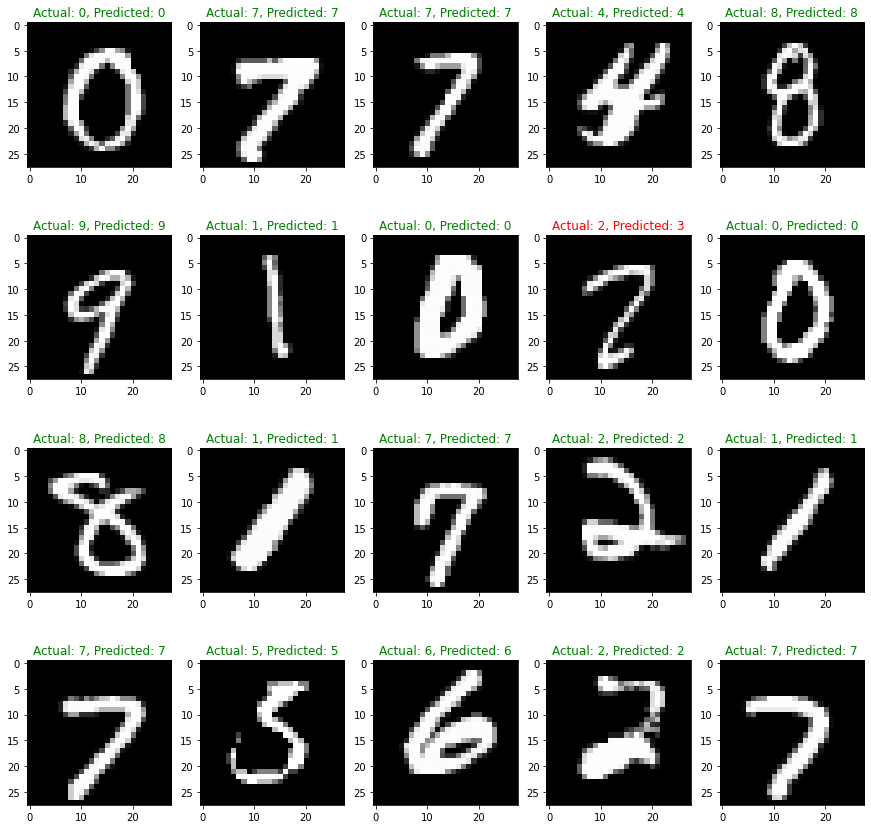

In [ ]:
from matplotlib import pyplot as plt

idx = np.random.randint(len(test_images), size=20)

f = plt.figure(figsize=(15,15))

for i in range(len(idx)):
    img = convert_to_img(np.array(test_images[idx[i]]));
    label = "Actual: {}, Predicted: {}".format(test_labels[idx[i]], predicted_labels[idx[i]])
    if str(test_labels[idx[i]]) == str(predicted_labels[idx[i]]):
        f.add_subplot(4, 5, i+1).set_title(label,  color='green');
    else:
        f.add_subplot(4, 5, i+1).set_title(label,  color='red');
    plt.imshow(img, cmap='gray');

plt.show()

# Summary of the experiments

- Experiment 1
  - ![](https://drive.google.com/uc?export=view&id=16d7F3TpDwTmno_-ihsCuLQ1V40WSFfA8)
  - Initial accuracy is 94.98%

- Experiment 2
  - ![](https://drive.google.com/uc?export=view&id=1iiyrwD333AiZRo_qwYJDPqw-yPjXW60m)
  - Updated accuracy is 95.23%

- Experiment 3
  - ![](https://drive.google.com/uc?export=view&id=1VzWw7-HMrox-_LDhHN0nIGichhdeP-Iw)
  - Updated accuracy is 95.3%


The final predictions on some samples are
![](https://drive.google.com/uc?export=view&id=1CabeVRuA0IQDPVd-IctuTDqTEmtXJh4S)

The predictions which are correct are written in green and which are incorrect are in red

# Assignment

Your first hands on assignment on training a neural network in fashion domain. Fashion Mnist is an open source dataset, https://github.com/zalandoresearch/fashion-mnist. As stated in https://keras.io/api/datasets/fashion_mnist/, 

"The copyright for Fashion-MNIST is held by Zalando SE. Fashion-MNIST is licensed under the MIT license."

![](https://drive.google.com/uc?export=view&id=1VBmKL8mdYlCZ3ZLVKjCnlPU6CZ6W7gYr)

How to download and access the dataset is shown below. 

Your goal is to train a classifier and reach more than 80% accuracy on testing dataset.
- Split the original training data into training and validation
- You can create a network of any depth
- Play with parameters such as learning rate, epoch numbers, and batch size


Its a great bonus if you can get accuracies above 85%!!!!!! Try for that with some 20-30 experiments

In [ ]:
# Remove mnist data
! rm *.gz*

In [ ]:
# Train dataset download

In [1]:
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

--2022-02-08 16:00:25--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.171.32
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.171.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  10.8MB/s    in 2.3s    

2022-02-08 16:00:28 (10.8 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2022-02-08 16:00:28--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.171.32
Connecting to fashion-mnist.s3-website.eu-central-1.amaz

In [ ]:
# Test dataset

In [2]:
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2022-02-08 16:00:28--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.171.32
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.171.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [binary/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   4.22M  3.61MB/s    in 1.2s    

2022-02-08 16:00:30 (3.61 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [4422102/4422102]

--2022-02-08 16:00:30--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.170.124
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws

In [3]:
! pip install python-mnist
# License for python-mnist: https://github.com/sorki/python-mnist/blob/master/LICENSE

In [5]:
import os 
import numpy as np 
from matplotlib import pyplot as plt

In [6]:
# Import pytorch library
import torch

# Import two important sub-parts of torch
from torch import nn, optim

In [7]:
from mnist import MNIST
mndata = MNIST('.')
mndata.gz = True
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [8]:
print("Total training images: {}".format(len(train_images)));
print("Total testing images: {}".format(len(test_images)));

Total training images: 60000
Total testing images: 10000


In [ ]:
# In this format each image is put as a single 1D vector, rather than a 2D vector

In [ ]:
# Using this function you can convert the 1D vector to 2D and visualize the images

In [9]:
def convert_to_img(vec):
    img = vec.reshape((28,28))
    return img;

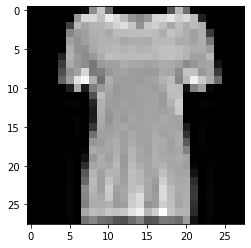

In [10]:
from matplotlib import pyplot as plt

img = convert_to_img(np.array(train_images[10]));
plt.imshow(img, cmap='gray')
plt.show()

In [11]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

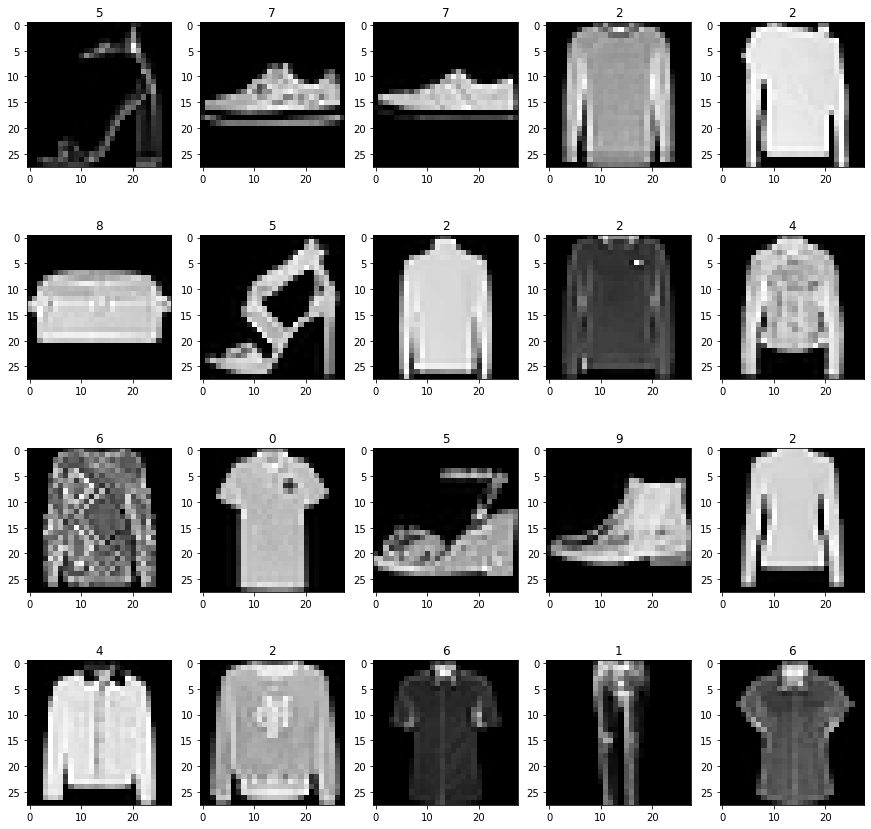

In [12]:
from matplotlib import pyplot as plt

idx = np.random.randint(len(train_images), size=20)

f = plt.figure(figsize=(15,15))

for i in range(len(idx)):
    img = convert_to_img(np.array(train_images[idx[i]]));
    label = str(train_labels[idx[i]])

    f.add_subplot(4, 5, i+1).set_title(label);
    plt.imshow(img, cmap='gray');

plt.show()

In [ ]:
# Train this using multi-layer perceptrons to get more than 90% accuracy
# Log all your experiments with accuracies, training and loss curves and save model for all 

In [13]:
from sklearn.utils import shuffle

train_images, train_labels = shuffle(train_images, train_labels)

val_images = train_images[50000:]
val_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [14]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [15]:
print("No of training images: {}".format(len(train_images)));
print("No of validation images: {}".format(len(val_images)));
print("No of testing images: {}".format(len(test_images)));


No of training images: 50000
No of validation images: 10000
No of testing images: 10000


In [16]:
# Second part

def random_sampler(input_vecs, target_vecs, batch_size=100, num_classes=2):
    idx = np.random.randint(len(input_vecs), size=batch_size)
    input_vecs_sampled = input_vecs[idx, :]
    target_vecs_sampled = target_vecs[idx]

    target_vecs_sampled = np.eye(num_classes)[target_vecs_sampled]

    return input_vecs_sampled, target_vecs_sampled;             

In [17]:
# Third part


class Classify_Mnist(torch.nn.Module):
    def __init__(self, num_inputs=784, hidden_layers=(10, 5), num_outputs=10):
        super(Classify_Mnist, self).__init__()
        self.num_inputs = num_inputs;
        self.hidden_layers = hidden_layers;
        self.num_outputs = num_outputs;


        self.layers = []
        if(len(hidden_layers) == 0):
            layer = nn.Linear(self.num_inputs, self.num_outputs);
            self.layers.append(layer)
            activation = nn.Sigmoid()
            self.layers.append(activation)
        else:
            num_perceptrons_list = [self.num_inputs] + list(self.hidden_layers) + [self.num_outputs];
            for i in range(len(num_perceptrons_list)-1):
                layer = nn.Linear(num_perceptrons_list[i], num_perceptrons_list[i+1]);
                self.layers.append(layer);
                activation = nn.Sigmoid();
                self.layers.append(activation);

        self.layers = nn.ModuleList(self.layers);

    def forward(self, input_vec):
        # Newly added
        out = torch.FloatTensor(input_vec)

        for i in range(len(self.layers)):
            out = self.layers[i](out)

        return out

In [ ]:
# Fourth part

In [18]:
from tqdm import tqdm

# We need to add a system where after every n-iteration/epoch 
# Validation loss and accuracy will be calculated

# introduce accuracy finding function
# We save model which had best validation accuracy

def train_the_model(model, train_input_vecs, train_target_vecs, 
                    val_input_vecs, val_target_vecs,
                    learning_rate=0.01, num_epochs=100,  
                    train_batch_size=100, val_batch_size=500,
                    num_classes=2, validation_after_n=50):
    loss_calculator = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    
    # training
    training_loss_data = [];
    training_accuracy_data = [];
    
    # validation
    validation_loss_data = [];
    validation_accuracy_data = [];

    best_validation_accuracy = 0;

    for i in tqdm(range(num_epochs)):
        ############################ THIS IS THE TRAINING PART ################################
        ############################ Same as before ###########################################
        # Sample data
        input_vecs_sampled, target_vecs_sampled = random_sampler(train_input_vecs,
                                                          train_target_vecs,
                                                          batch_size=train_batch_size,
                                                          num_classes=num_classes);
        
        # Forward
        all_predictions = model.forward(input_vecs_sampled);

        # Loss function
        loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
        training_loss_data.append(loss.item())

        # find training_batch_accuracy
        all_predictions = all_predictions.squeeze();
        accuracy = 0;
        for j in range(len(all_predictions)):
            predicted_class = torch.argmax(all_predictions[j]);
            actual_class = np.argmax(target_vecs_sampled[j]);
            if predicted_class == actual_class:
                accuracy += 1;
        training_accuracy_data.append(accuracy/len(all_predictions))

        # Make backprop parameters 0
        optimizer.zero_grad()

        # Calculate backpropagation
        loss.backward()

        # Backpropagate weights
        optimizer.step()
        #########################################################################################


        ############################ THIS IS THE Validation PART ################################
        # Perform validation after every specified epoch/iteration
        if(i%validation_after_n == 0):
            # Sample data
            input_vecs_sampled, target_vecs_sampled = random_sampler(val_input_vecs,
                                                              val_target_vecs,
                                                              batch_size=val_batch_size,
                                                              num_classes=num_classes);
            
            # Forward
            all_predictions = model.forward(input_vecs_sampled);

            all_predictions = all_predictions.squeeze();

            # Loss function
            loss = loss_calculator(all_predictions.squeeze(), torch.FloatTensor(target_vecs_sampled))
            validation_loss_data.append(loss.item())

            # find training_batch_accuracy
            accuracy = 0;
            for j in range(len(all_predictions)):
                predicted_class = torch.argmax(all_predictions[j]);
                actual_class = np.argmax(target_vecs_sampled[j]);
                if predicted_class == actual_class:
                    accuracy += 1;
            validation_accuracy_data.append(accuracy/len(all_predictions))

            print("\nEpoch: {}, train_acc: {}, val_acc: {}, train_loss: {}, val_loss: {}".format(
                i, training_accuracy_data[-1]*100, validation_accuracy_data[-1],
                training_loss_data[-1], validation_loss_data[-1]*100
            ))

            # Save the best model
            if best_validation_accuracy <= accuracy/len(all_predictions)*100:
                best_validation_accuracy = accuracy/len(all_predictions)*100;
                torch.save(model, "best.pt");
            
            torch.save(model, "latest.pt");
      ###################################################################################################

    return (model, training_loss_data, training_accuracy_data, validation_loss_data, validation_accuracy_data);

In [19]:
my_model = Classify_Mnist(num_inputs=784, hidden_layers=(350, ), num_outputs=10);

In [20]:
output = train_the_model(my_model, train_images, train_labels,
                                           val_images, val_labels,
                                           learning_rate=0.1, num_epochs=1000000,  
                                           train_batch_size=16, val_batch_size=2000,
                                           num_classes=10, validation_after_n=5000)

  0%|          | 33/1000000 [00:00<2:28:03, 112.56it/s]


Epoch: 0, train_acc: 12.5, val_acc: 0.142, train_loss: 0.6882398724555969, val_loss: 45.864492654800415


  1%|          | 5061/1000000 [00:12<41:23, 400.67it/s]


Epoch: 5000, train_acc: 68.75, val_acc: 0.751, train_loss: 0.14287486672401428, val_loss: 12.754231691360474


  1%|          | 10081/1000000 [00:23<38:48, 425.16it/s]


Epoch: 10000, train_acc: 87.5, val_acc: 0.749, train_loss: 0.10064326226711273, val_loss: 13.006876409053802


  2%|▏         | 15064/1000000 [00:34<38:25, 427.15it/s]


Epoch: 15000, train_acc: 87.5, val_acc: 0.7475, train_loss: 0.09371545165777206, val_loss: 12.651194632053375


  2%|▏         | 20059/1000000 [00:44<37:31, 435.27it/s]


Epoch: 20000, train_acc: 87.5, val_acc: 0.744, train_loss: 0.10895173251628876, val_loss: 13.196147978305817


  3%|▎         | 25079/1000000 [00:54<36:36, 443.81it/s]


Epoch: 25000, train_acc: 68.75, val_acc: 0.7195, train_loss: 0.11162720620632172, val_loss: 12.903958559036255


  3%|▎         | 30081/1000000 [01:04<36:37, 441.46it/s]


Epoch: 30000, train_acc: 81.25, val_acc: 0.7485, train_loss: 0.12661835551261902, val_loss: 13.390766084194183


  4%|▎         | 35094/1000000 [01:14<36:12, 444.13it/s]


Epoch: 35000, train_acc: 75.0, val_acc: 0.756, train_loss: 0.11401207745075226, val_loss: 13.711749017238617


  4%|▍         | 40069/1000000 [01:24<36:11, 441.96it/s]


Epoch: 40000, train_acc: 87.5, val_acc: 0.7225, train_loss: 0.10339517891407013, val_loss: 14.126643538475037


  5%|▍         | 45098/1000000 [01:34<35:41, 445.89it/s]


Epoch: 45000, train_acc: 75.0, val_acc: 0.744, train_loss: 0.12737531960010529, val_loss: 12.528644502162933


  5%|▌         | 50052/1000000 [01:43<36:02, 439.20it/s]


Epoch: 50000, train_acc: 68.75, val_acc: 0.717, train_loss: 0.11238072067499161, val_loss: 13.918139040470123


  6%|▌         | 55059/1000000 [01:53<34:27, 457.06it/s]


Epoch: 55000, train_acc: 68.75, val_acc: 0.746, train_loss: 0.1397470086812973, val_loss: 13.02226334810257


  6%|▌         | 60075/1000000 [02:03<34:07, 458.99it/s]


Epoch: 60000, train_acc: 56.25, val_acc: 0.694, train_loss: 0.176872119307518, val_loss: 14.03273493051529


  7%|▋         | 65057/1000000 [02:12<34:42, 448.97it/s]


Epoch: 65000, train_acc: 68.75, val_acc: 0.7195, train_loss: 0.14461220800876617, val_loss: 13.428737223148346


  7%|▋         | 70107/1000000 [02:22<33:29, 462.76it/s]


Epoch: 70000, train_acc: 62.5, val_acc: 0.725, train_loss: 0.19566090404987335, val_loss: 15.073856711387634


  8%|▊         | 75087/1000000 [02:31<33:29, 460.30it/s]


Epoch: 75000, train_acc: 68.75, val_acc: 0.731, train_loss: 0.1750277280807495, val_loss: 13.685758411884308


  8%|▊         | 80106/1000000 [02:41<32:41, 468.99it/s]


Epoch: 80000, train_acc: 75.0, val_acc: 0.7115, train_loss: 0.11534781754016876, val_loss: 13.516432046890259


  9%|▊         | 85065/1000000 [02:51<33:45, 451.64it/s]


Epoch: 85000, train_acc: 62.5, val_acc: 0.7205, train_loss: 0.17555299401283264, val_loss: 13.538970053195953


  9%|▉         | 90063/1000000 [03:01<33:21, 454.55it/s]


Epoch: 90000, train_acc: 56.25, val_acc: 0.766, train_loss: 0.20327062904834747, val_loss: 11.16979718208313


 10%|▉         | 95073/1000000 [03:10<32:57, 457.70it/s]


Epoch: 95000, train_acc: 68.75, val_acc: 0.7255, train_loss: 0.14169193804264069, val_loss: 13.91734778881073


 10%|█         | 100088/1000000 [03:20<33:50, 443.27it/s]


Epoch: 100000, train_acc: 81.25, val_acc: 0.7465, train_loss: 0.10272464901208878, val_loss: 13.117356598377228


 11%|█         | 105070/1000000 [03:29<33:08, 450.05it/s]


Epoch: 105000, train_acc: 75.0, val_acc: 0.706, train_loss: 0.1284531056880951, val_loss: 13.594217598438263


 11%|█         | 110081/1000000 [03:39<32:13, 460.32it/s]


Epoch: 110000, train_acc: 68.75, val_acc: 0.7185, train_loss: 0.14318443834781647, val_loss: 13.885800540447235


 12%|█▏        | 115065/1000000 [03:48<31:49, 463.32it/s]


Epoch: 115000, train_acc: 75.0, val_acc: 0.738, train_loss: 0.13072620332241058, val_loss: 14.18641209602356


 12%|█▏        | 120089/1000000 [03:58<30:47, 476.34it/s]


Epoch: 120000, train_acc: 43.75, val_acc: 0.7235, train_loss: 0.1734851747751236, val_loss: 13.702680170536041


 13%|█▎        | 125097/1000000 [04:08<31:42, 459.81it/s]


Epoch: 125000, train_acc: 87.5, val_acc: 0.693, train_loss: 0.10798555612564087, val_loss: 13.996528089046478


 13%|█▎        | 130055/1000000 [04:17<31:22, 462.10it/s]


Epoch: 130000, train_acc: 81.25, val_acc: 0.727, train_loss: 0.11030834913253784, val_loss: 13.420844078063965


 14%|█▎        | 135093/1000000 [04:27<30:55, 466.09it/s]


Epoch: 135000, train_acc: 75.0, val_acc: 0.738, train_loss: 0.10484252125024796, val_loss: 12.92874962091446


 14%|█▍        | 140056/1000000 [04:36<30:35, 468.47it/s]


Epoch: 140000, train_acc: 50.0, val_acc: 0.7, train_loss: 0.17257128655910492, val_loss: 14.667844772338867


 15%|█▍        | 145093/1000000 [04:46<31:34, 451.14it/s]


Epoch: 145000, train_acc: 75.0, val_acc: 0.6945, train_loss: 0.13621866703033447, val_loss: 14.399105310440063


 15%|█▌        | 150065/1000000 [04:56<54:42, 258.94it/s]  


Epoch: 150000, train_acc: 68.75, val_acc: 0.686, train_loss: 0.12322266399860382, val_loss: 14.620064198970795


 16%|█▌        | 155058/1000000 [05:06<30:05, 468.07it/s]


Epoch: 155000, train_acc: 75.0, val_acc: 0.6865, train_loss: 0.13710063695907593, val_loss: 14.141443371772766


 16%|█▌        | 160055/1000000 [05:15<29:51, 468.87it/s]


Epoch: 160000, train_acc: 87.5, val_acc: 0.728, train_loss: 0.14674559235572815, val_loss: 14.256007969379425


 17%|█▋        | 165072/1000000 [05:25<29:18, 474.82it/s]


Epoch: 165000, train_acc: 75.0, val_acc: 0.645, train_loss: 0.09315484017133713, val_loss: 15.406140685081482


 17%|█▋        | 170049/1000000 [05:34<31:55, 433.22it/s]


Epoch: 170000, train_acc: 68.75, val_acc: 0.7025, train_loss: 0.1963581144809723, val_loss: 15.902797877788544


 18%|█▊        | 175096/1000000 [05:44<29:38, 463.94it/s]


Epoch: 175000, train_acc: 75.0, val_acc: 0.7105, train_loss: 0.15129752457141876, val_loss: 13.512828946113586


 18%|█▊        | 180054/1000000 [05:53<31:00, 440.83it/s]


Epoch: 180000, train_acc: 68.75, val_acc: 0.7075, train_loss: 0.133909672498703, val_loss: 13.657563924789429


 19%|█▊        | 185072/1000000 [06:03<29:54, 454.17it/s]


Epoch: 185000, train_acc: 50.0, val_acc: 0.6535, train_loss: 0.2183046042919159, val_loss: 15.534090995788574


 19%|█▉        | 190083/1000000 [06:12<28:44, 469.72it/s]


Epoch: 190000, train_acc: 56.25, val_acc: 0.7065, train_loss: 0.21226485073566437, val_loss: 13.645598292350769


 20%|█▉        | 195081/1000000 [06:22<28:29, 470.74it/s]


Epoch: 195000, train_acc: 43.75, val_acc: 0.662, train_loss: 0.22548699378967285, val_loss: 16.427600383758545


 20%|██        | 200052/1000000 [06:31<31:06, 428.62it/s]


Epoch: 200000, train_acc: 56.25, val_acc: 0.608, train_loss: 0.27525514364242554, val_loss: 16.39033854007721


 21%|██        | 205050/1000000 [06:40<29:05, 455.46it/s]


Epoch: 205000, train_acc: 75.0, val_acc: 0.6965, train_loss: 0.11138148605823517, val_loss: 13.315260410308838


 21%|██        | 210047/1000000 [06:50<31:34, 417.02it/s]


Epoch: 210000, train_acc: 68.75, val_acc: 0.7165, train_loss: 0.16739249229431152, val_loss: 14.775943756103516


 22%|██▏       | 215055/1000000 [06:59<28:06, 465.31it/s]


Epoch: 215000, train_acc: 62.5, val_acc: 0.6985, train_loss: 0.12332163006067276, val_loss: 13.472330570220947


 22%|██▏       | 220077/1000000 [07:09<27:35, 471.20it/s]


Epoch: 220000, train_acc: 56.25, val_acc: 0.6695, train_loss: 0.15737685561180115, val_loss: 15.205825865268707


 23%|██▎       | 225100/1000000 [07:18<28:32, 452.58it/s]


Epoch: 225000, train_acc: 62.5, val_acc: 0.663, train_loss: 0.1348123401403427, val_loss: 15.71325957775116


 23%|██▎       | 230101/1000000 [07:28<27:32, 465.95it/s]


Epoch: 230000, train_acc: 50.0, val_acc: 0.6695, train_loss: 0.16151288151741028, val_loss: 14.95668888092041


 24%|██▎       | 235054/1000000 [07:37<27:20, 466.29it/s]


Epoch: 235000, train_acc: 68.75, val_acc: 0.687, train_loss: 0.148207426071167, val_loss: 14.393962919712067


 24%|██▍       | 240071/1000000 [07:47<26:57, 469.68it/s]


Epoch: 240000, train_acc: 75.0, val_acc: 0.7215, train_loss: 0.15608805418014526, val_loss: 14.817160367965698


 25%|██▍       | 245069/1000000 [07:56<26:57, 466.66it/s]


Epoch: 245000, train_acc: 62.5, val_acc: 0.675, train_loss: 0.16560694575309753, val_loss: 14.84111100435257


 25%|██▌       | 250072/1000000 [08:05<27:02, 462.22it/s]


Epoch: 250000, train_acc: 68.75, val_acc: 0.594, train_loss: 0.1332310438156128, val_loss: 18.56778860092163


 26%|██▌       | 255081/1000000 [08:15<26:44, 464.34it/s]


Epoch: 255000, train_acc: 62.5, val_acc: 0.65, train_loss: 0.1269422322511673, val_loss: 14.6415114402771


 26%|██▌       | 260084/1000000 [08:24<25:48, 477.75it/s]


Epoch: 260000, train_acc: 68.75, val_acc: 0.681, train_loss: 0.13593821227550507, val_loss: 13.834066689014435


 27%|██▋       | 265076/1000000 [08:34<26:53, 455.46it/s]


Epoch: 265000, train_acc: 75.0, val_acc: 0.724, train_loss: 0.147367924451828, val_loss: 12.985272705554962


 27%|██▋       | 270080/1000000 [08:43<25:51, 470.50it/s]


Epoch: 270000, train_acc: 75.0, val_acc: 0.6965, train_loss: 0.14806464314460754, val_loss: 13.912613689899445


 28%|██▊       | 275097/1000000 [08:53<25:37, 471.59it/s]


Epoch: 275000, train_acc: 75.0, val_acc: 0.6705, train_loss: 0.11161645501852036, val_loss: 14.263060688972473


 28%|██▊       | 280069/1000000 [09:02<25:55, 462.69it/s]


Epoch: 280000, train_acc: 87.5, val_acc: 0.666, train_loss: 0.1041824221611023, val_loss: 14.885659515857697


 29%|██▊       | 285106/1000000 [09:12<25:12, 472.58it/s]


Epoch: 285000, train_acc: 87.5, val_acc: 0.711, train_loss: 0.0787804126739502, val_loss: 13.477712869644165


 29%|██▉       | 290096/1000000 [09:21<25:26, 464.92it/s]


Epoch: 290000, train_acc: 93.75, val_acc: 0.739, train_loss: 0.07663106173276901, val_loss: 13.019150495529175


 30%|██▉       | 295075/1000000 [09:31<25:22, 463.13it/s]


Epoch: 295000, train_acc: 81.25, val_acc: 0.7085, train_loss: 0.110213503241539, val_loss: 13.350015878677368


 30%|███       | 300079/1000000 [09:40<25:23, 459.44it/s]


Epoch: 300000, train_acc: 68.75, val_acc: 0.738, train_loss: 0.13648036122322083, val_loss: 12.857116758823395


 31%|███       | 305067/1000000 [09:50<25:25, 455.42it/s]


Epoch: 305000, train_acc: 75.0, val_acc: 0.746, train_loss: 0.13189281523227692, val_loss: 12.338842451572418


 31%|███       | 310082/1000000 [09:59<24:32, 468.68it/s]


Epoch: 310000, train_acc: 75.0, val_acc: 0.74, train_loss: 0.11426909267902374, val_loss: 12.408313900232315


 32%|███▏      | 315055/1000000 [10:09<24:06, 473.45it/s]


Epoch: 315000, train_acc: 81.25, val_acc: 0.7125, train_loss: 0.13233467936515808, val_loss: 15.20938128232956


 32%|███▏      | 320068/1000000 [10:18<25:13, 449.36it/s]


Epoch: 320000, train_acc: 75.0, val_acc: 0.713, train_loss: 0.18095284700393677, val_loss: 13.384059071540833


 33%|███▎      | 325057/1000000 [10:28<23:49, 472.27it/s]


Epoch: 325000, train_acc: 75.0, val_acc: 0.6455, train_loss: 0.12461137771606445, val_loss: 14.984558522701263


 33%|███▎      | 330075/1000000 [10:37<24:11, 461.60it/s]


Epoch: 330000, train_acc: 81.25, val_acc: 0.742, train_loss: 0.11391179263591766, val_loss: 13.112951815128326


 34%|███▎      | 335069/1000000 [10:47<23:48, 465.33it/s]


Epoch: 335000, train_acc: 56.25, val_acc: 0.6775, train_loss: 0.18806451559066772, val_loss: 16.32331907749176


 34%|███▍      | 340069/1000000 [10:56<23:32, 467.31it/s]


Epoch: 340000, train_acc: 68.75, val_acc: 0.7055, train_loss: 0.14732424914836884, val_loss: 14.609071612358093


 35%|███▍      | 345080/1000000 [11:06<23:01, 474.10it/s]


Epoch: 345000, train_acc: 68.75, val_acc: 0.6635, train_loss: 0.1696232259273529, val_loss: 15.123303234577179


 35%|███▌      | 350065/1000000 [11:15<23:13, 466.53it/s]


Epoch: 350000, train_acc: 75.0, val_acc: 0.7225, train_loss: 0.1543865203857422, val_loss: 14.502611756324768


 36%|███▌      | 355080/1000000 [11:25<22:49, 470.81it/s]


Epoch: 355000, train_acc: 81.25, val_acc: 0.709, train_loss: 0.0897669643163681, val_loss: 13.297374546527863


 36%|███▌      | 360074/1000000 [11:34<22:42, 469.84it/s]


Epoch: 360000, train_acc: 75.0, val_acc: 0.703, train_loss: 0.15593507885932922, val_loss: 14.632277190685272


 37%|███▋      | 365084/1000000 [11:43<23:17, 454.36it/s]


Epoch: 365000, train_acc: 75.0, val_acc: 0.735, train_loss: 0.1387639343738556, val_loss: 13.104477524757385


 37%|███▋      | 370095/1000000 [11:53<22:58, 457.06it/s]


Epoch: 370000, train_acc: 93.75, val_acc: 0.725, train_loss: 0.07132410258054733, val_loss: 13.399049639701843


 38%|███▊      | 375095/1000000 [12:02<22:06, 471.06it/s]


Epoch: 375000, train_acc: 81.25, val_acc: 0.765, train_loss: 0.12401922047138214, val_loss: 12.047508358955383


 38%|███▊      | 380097/1000000 [12:12<22:07, 466.81it/s]


Epoch: 380000, train_acc: 87.5, val_acc: 0.7615, train_loss: 0.08850271254777908, val_loss: 11.699382215738297


 39%|███▊      | 385087/1000000 [12:21<21:35, 474.74it/s]


Epoch: 385000, train_acc: 75.0, val_acc: 0.724, train_loss: 0.1272418200969696, val_loss: 11.898920685052872


 39%|███▉      | 390081/1000000 [12:30<21:37, 469.98it/s]


Epoch: 390000, train_acc: 75.0, val_acc: 0.731, train_loss: 0.09579036384820938, val_loss: 12.413669377565384


 40%|███▉      | 395067/1000000 [12:40<21:21, 471.90it/s]


Epoch: 395000, train_acc: 62.5, val_acc: 0.7295, train_loss: 0.12856271862983704, val_loss: 12.949870526790619


 40%|████      | 400072/1000000 [12:49<21:47, 458.67it/s]


Epoch: 400000, train_acc: 75.0, val_acc: 0.747, train_loss: 0.09920798242092133, val_loss: 11.697378009557724


 41%|████      | 405102/1000000 [12:59<20:53, 474.74it/s]


Epoch: 405000, train_acc: 87.5, val_acc: 0.713, train_loss: 0.07839827239513397, val_loss: 13.986031711101532


 41%|████      | 410066/1000000 [13:08<20:26, 481.10it/s]


Epoch: 410000, train_acc: 75.0, val_acc: 0.6645, train_loss: 0.08698569983243942, val_loss: 13.78910094499588


 42%|████▏     | 415103/1000000 [13:17<21:02, 463.31it/s]


Epoch: 415000, train_acc: 50.0, val_acc: 0.7255, train_loss: 0.18599386513233185, val_loss: 12.937402725219727


 42%|████▏     | 420051/1000000 [13:27<21:28, 450.13it/s]


Epoch: 420000, train_acc: 75.0, val_acc: 0.683, train_loss: 0.1085154265165329, val_loss: 14.023011922836304


 43%|████▎     | 425079/1000000 [13:36<20:09, 475.44it/s]


Epoch: 425000, train_acc: 62.5, val_acc: 0.6905, train_loss: 0.20356278121471405, val_loss: 13.681961596012115


 43%|████▎     | 430086/1000000 [13:46<20:07, 471.93it/s]


Epoch: 430000, train_acc: 68.75, val_acc: 0.6825, train_loss: 0.116683229804039, val_loss: 13.874532282352448


 44%|████▎     | 435071/1000000 [13:55<19:51, 474.04it/s]


Epoch: 435000, train_acc: 62.5, val_acc: 0.723, train_loss: 0.13055938482284546, val_loss: 12.722836434841156


 44%|████▍     | 440079/1000000 [14:04<20:41, 451.17it/s]


Epoch: 440000, train_acc: 81.25, val_acc: 0.72, train_loss: 0.14015544950962067, val_loss: 12.81733512878418


 45%|████▍     | 445108/1000000 [14:14<19:34, 472.54it/s]


Epoch: 445000, train_acc: 75.0, val_acc: 0.722, train_loss: 0.09569761902093887, val_loss: 13.73177319765091


 45%|████▌     | 450102/1000000 [14:23<19:27, 470.91it/s]


Epoch: 450000, train_acc: 75.0, val_acc: 0.725, train_loss: 0.10912491381168365, val_loss: 13.705334067344666


 46%|████▌     | 455061/1000000 [14:33<19:31, 465.29it/s]


Epoch: 455000, train_acc: 75.0, val_acc: 0.712, train_loss: 0.07710825651884079, val_loss: 12.597288191318512


 46%|████▌     | 460107/1000000 [14:42<18:47, 479.00it/s]


Epoch: 460000, train_acc: 81.25, val_acc: 0.727, train_loss: 0.09317250549793243, val_loss: 12.321826070547104


 47%|████▋     | 465106/1000000 [14:52<19:23, 459.92it/s]


Epoch: 465000, train_acc: 87.5, val_acc: 0.7295, train_loss: 0.08059102296829224, val_loss: 12.783591449260712


 47%|████▋     | 470077/1000000 [15:01<19:21, 456.38it/s]


Epoch: 470000, train_acc: 75.0, val_acc: 0.7335, train_loss: 0.11539866030216217, val_loss: 12.169338017702103


 48%|████▊     | 475072/1000000 [15:10<18:48, 465.01it/s]


Epoch: 475000, train_acc: 81.25, val_acc: 0.7175, train_loss: 0.11785910278558731, val_loss: 12.132619321346283


 48%|████▊     | 480085/1000000 [15:20<18:55, 457.69it/s]


Epoch: 480000, train_acc: 68.75, val_acc: 0.7125, train_loss: 0.11757536977529526, val_loss: 12.768515944480896


 49%|████▊     | 485101/1000000 [15:29<18:20, 467.81it/s]


Epoch: 485000, train_acc: 75.0, val_acc: 0.6845, train_loss: 0.15357676148414612, val_loss: 13.375024497509003


 49%|████▉     | 490093/1000000 [15:39<18:10, 467.38it/s]


Epoch: 490000, train_acc: 68.75, val_acc: 0.7295, train_loss: 0.1274167150259018, val_loss: 12.969662249088287


 50%|████▉     | 495062/1000000 [15:48<18:05, 465.06it/s]


Epoch: 495000, train_acc: 62.5, val_acc: 0.6985, train_loss: 0.1506003439426422, val_loss: 14.950031042098999


 50%|█████     | 500066/1000000 [15:58<18:39, 446.74it/s]


Epoch: 500000, train_acc: 43.75, val_acc: 0.676, train_loss: 0.18852797150611877, val_loss: 13.896425068378448


 51%|█████     | 505102/1000000 [16:07<17:31, 470.63it/s]


Epoch: 505000, train_acc: 75.0, val_acc: 0.761, train_loss: 0.10991914570331573, val_loss: 12.118960171937943


 51%|█████     | 510059/1000000 [16:16<17:14, 473.68it/s]


Epoch: 510000, train_acc: 68.75, val_acc: 0.67, train_loss: 0.1389186531305313, val_loss: 14.078941941261292


 52%|█████▏    | 515061/1000000 [16:26<17:42, 456.21it/s]


Epoch: 515000, train_acc: 68.75, val_acc: 0.7385, train_loss: 0.20687517523765564, val_loss: 13.083280622959137


 52%|█████▏    | 520089/1000000 [16:35<17:04, 468.46it/s]


Epoch: 520000, train_acc: 81.25, val_acc: 0.763, train_loss: 0.10414330661296844, val_loss: 11.932070553302765


 53%|█████▎    | 525087/1000000 [16:45<17:00, 465.23it/s]


Epoch: 525000, train_acc: 68.75, val_acc: 0.752, train_loss: 0.2065695822238922, val_loss: 12.346810102462769


 53%|█████▎    | 530105/1000000 [16:54<16:57, 462.04it/s]


Epoch: 530000, train_acc: 81.25, val_acc: 0.754, train_loss: 0.09315730631351471, val_loss: 11.95119246840477


 54%|█████▎    | 535072/1000000 [17:04<16:35, 466.97it/s]


Epoch: 535000, train_acc: 87.5, val_acc: 0.722, train_loss: 0.10139663517475128, val_loss: 12.673404812812805


 54%|█████▍    | 540067/1000000 [17:13<16:01, 478.16it/s]


Epoch: 540000, train_acc: 75.0, val_acc: 0.73, train_loss: 0.11818484961986542, val_loss: 13.086210191249847


 55%|█████▍    | 545069/1000000 [17:22<16:17, 465.56it/s]


Epoch: 545000, train_acc: 81.25, val_acc: 0.7245, train_loss: 0.16005006432533264, val_loss: 12.807904183864594


 55%|█████▌    | 550089/1000000 [17:32<16:02, 467.54it/s]


Epoch: 550000, train_acc: 62.5, val_acc: 0.698, train_loss: 0.17947989702224731, val_loss: 13.73991072177887


 56%|█████▌    | 555085/1000000 [17:41<15:34, 476.30it/s]


Epoch: 555000, train_acc: 56.25, val_acc: 0.7225, train_loss: 0.19374926388263702, val_loss: 13.255549967288971


 56%|█████▌    | 560077/1000000 [17:51<15:47, 464.32it/s]


Epoch: 560000, train_acc: 87.5, val_acc: 0.783, train_loss: 0.07286413758993149, val_loss: 11.889707297086716


 57%|█████▋    | 565069/1000000 [18:00<15:29, 468.11it/s]


Epoch: 565000, train_acc: 81.25, val_acc: 0.7545, train_loss: 0.1050698384642601, val_loss: 12.217201292514801


 57%|█████▋    | 570096/1000000 [18:09<14:50, 482.60it/s]


Epoch: 570000, train_acc: 50.0, val_acc: 0.7085, train_loss: 0.18049177527427673, val_loss: 13.365380465984344


 58%|█████▊    | 575097/1000000 [18:19<15:22, 460.35it/s]


Epoch: 575000, train_acc: 62.5, val_acc: 0.685, train_loss: 0.14272043108940125, val_loss: 13.13130408525467


 58%|█████▊    | 580091/1000000 [18:28<15:20, 456.32it/s]


Epoch: 580000, train_acc: 68.75, val_acc: 0.7495, train_loss: 0.1207299456000328, val_loss: 11.621008068323135


 59%|█████▊    | 585083/1000000 [18:37<14:31, 476.03it/s]


Epoch: 585000, train_acc: 87.5, val_acc: 0.735, train_loss: 0.06449981778860092, val_loss: 12.199325114488602


 59%|█████▉    | 590092/1000000 [18:47<14:22, 475.30it/s]


Epoch: 590000, train_acc: 37.5, val_acc: 0.7085, train_loss: 0.18758924305438995, val_loss: 12.358027696609497


 60%|█████▉    | 595078/1000000 [18:56<14:13, 474.31it/s]


Epoch: 595000, train_acc: 81.25, val_acc: 0.776, train_loss: 0.09882815182209015, val_loss: 12.00176253914833


 60%|██████    | 600055/1000000 [19:05<14:37, 455.92it/s]


Epoch: 600000, train_acc: 87.5, val_acc: 0.7675, train_loss: 0.06101493164896965, val_loss: 11.67219951748848


 61%|██████    | 605069/1000000 [19:15<14:16, 461.15it/s]


Epoch: 605000, train_acc: 50.0, val_acc: 0.7005, train_loss: 0.17475901544094086, val_loss: 13.863122463226318


 61%|██████    | 610105/1000000 [19:24<14:03, 462.42it/s]


Epoch: 610000, train_acc: 75.0, val_acc: 0.7165, train_loss: 0.13707609474658966, val_loss: 12.2681625187397


 62%|██████▏   | 615052/1000000 [19:34<14:58, 428.52it/s]


Epoch: 615000, train_acc: 62.5, val_acc: 0.6475, train_loss: 0.14888784289360046, val_loss: 15.41806012392044


 62%|██████▏   | 620055/1000000 [19:43<13:27, 470.48it/s]


Epoch: 620000, train_acc: 68.75, val_acc: 0.685, train_loss: 0.1293030083179474, val_loss: 14.266392588615417


 63%|██████▎   | 625065/1000000 [19:52<13:30, 462.76it/s]


Epoch: 625000, train_acc: 75.0, val_acc: 0.7145, train_loss: 0.08327363431453705, val_loss: 12.281233817338943


 63%|██████▎   | 630087/1000000 [20:02<13:11, 467.21it/s]


Epoch: 630000, train_acc: 75.0, val_acc: 0.702, train_loss: 0.10976686328649521, val_loss: 13.4611114859581


 64%|██████▎   | 635082/1000000 [20:11<13:06, 463.72it/s]


Epoch: 635000, train_acc: 37.5, val_acc: 0.6705, train_loss: 0.24039344489574432, val_loss: 13.996855914592743


 64%|██████▍   | 640066/1000000 [20:21<12:38, 474.62it/s]


Epoch: 640000, train_acc: 56.25, val_acc: 0.7235, train_loss: 0.2546237111091614, val_loss: 12.731248140335083


 65%|██████▍   | 645080/1000000 [20:30<12:25, 475.88it/s]


Epoch: 645000, train_acc: 87.5, val_acc: 0.739, train_loss: 0.0991429015994072, val_loss: 11.79533302783966


 65%|██████▌   | 650099/1000000 [20:39<12:24, 470.28it/s]


Epoch: 650000, train_acc: 81.25, val_acc: 0.714, train_loss: 0.18454203009605408, val_loss: 12.563347816467285


 66%|██████▌   | 655052/1000000 [20:49<14:17, 402.10it/s]


Epoch: 655000, train_acc: 81.25, val_acc: 0.738, train_loss: 0.1048494204878807, val_loss: 12.395033240318298


 66%|██████▌   | 660055/1000000 [20:58<11:57, 473.93it/s]


Epoch: 660000, train_acc: 75.0, val_acc: 0.7145, train_loss: 0.10797685384750366, val_loss: 12.358192354440689


 67%|██████▋   | 665086/1000000 [21:08<11:38, 479.63it/s]


Epoch: 665000, train_acc: 68.75, val_acc: 0.7345, train_loss: 0.13687893748283386, val_loss: 12.929244339466095


 67%|██████▋   | 670052/1000000 [21:17<11:54, 461.87it/s]


Epoch: 670000, train_acc: 68.75, val_acc: 0.7095, train_loss: 0.13517269492149353, val_loss: 13.0626380443573


 68%|██████▊   | 675070/1000000 [21:27<11:52, 456.02it/s]


Epoch: 675000, train_acc: 68.75, val_acc: 0.7025, train_loss: 0.10662265866994858, val_loss: 12.206622213125229


 68%|██████▊   | 680066/1000000 [21:36<11:04, 481.13it/s]


Epoch: 680000, train_acc: 62.5, val_acc: 0.7545, train_loss: 0.1430799961090088, val_loss: 11.90878450870514


 69%|██████▊   | 685081/1000000 [21:45<10:59, 477.21it/s]


Epoch: 685000, train_acc: 75.0, val_acc: 0.7385, train_loss: 0.1104251965880394, val_loss: 11.640459299087524


 69%|██████▉   | 690083/1000000 [21:55<11:29, 449.75it/s]


Epoch: 690000, train_acc: 75.0, val_acc: 0.7365, train_loss: 0.10862479358911514, val_loss: 11.590461432933807


 70%|██████▉   | 695054/1000000 [22:04<11:33, 439.81it/s]


Epoch: 695000, train_acc: 62.5, val_acc: 0.6875, train_loss: 0.10554157197475433, val_loss: 13.326799869537354


 70%|███████   | 700094/1000000 [22:14<10:41, 467.68it/s]


Epoch: 700000, train_acc: 75.0, val_acc: 0.721, train_loss: 0.09716169536113739, val_loss: 12.69616037607193


 71%|███████   | 705083/1000000 [22:23<10:28, 469.38it/s]


Epoch: 705000, train_acc: 81.25, val_acc: 0.7355, train_loss: 0.11272354423999786, val_loss: 12.435124814510345


 71%|███████   | 710101/1000000 [22:33<10:27, 462.09it/s]


Epoch: 710000, train_acc: 87.5, val_acc: 0.752, train_loss: 0.08424593508243561, val_loss: 11.793095618486404


 72%|███████▏  | 715080/1000000 [22:43<10:16, 461.85it/s]


Epoch: 715000, train_acc: 75.0, val_acc: 0.7385, train_loss: 0.10465346276760101, val_loss: 11.766021698713303


 72%|███████▏  | 720091/1000000 [22:52<09:51, 473.55it/s]


Epoch: 720000, train_acc: 75.0, val_acc: 0.775, train_loss: 0.12172994762659073, val_loss: 11.3602414727211


 73%|███████▎  | 725095/1000000 [23:02<10:06, 453.42it/s]


Epoch: 725000, train_acc: 81.25, val_acc: 0.7375, train_loss: 0.08175311982631683, val_loss: 11.141417175531387


 73%|███████▎  | 730066/1000000 [23:11<09:25, 477.39it/s]


Epoch: 730000, train_acc: 75.0, val_acc: 0.722, train_loss: 0.15060341358184814, val_loss: 11.533498764038086


 74%|███████▎  | 735110/1000000 [23:21<09:18, 474.57it/s]


Epoch: 735000, train_acc: 68.75, val_acc: 0.745, train_loss: 0.1357271522283554, val_loss: 11.257689446210861


 74%|███████▍  | 740078/1000000 [23:30<09:11, 471.11it/s]


Epoch: 740000, train_acc: 62.5, val_acc: 0.7495, train_loss: 0.14435230195522308, val_loss: 11.635398119688034


 75%|███████▍  | 745086/1000000 [23:39<09:10, 463.24it/s]


Epoch: 745000, train_acc: 81.25, val_acc: 0.724, train_loss: 0.08600908517837524, val_loss: 12.010690569877625


 75%|███████▌  | 750072/1000000 [23:49<09:06, 457.71it/s]


Epoch: 750000, train_acc: 81.25, val_acc: 0.7645, train_loss: 0.11207262426614761, val_loss: 11.584632843732834


 76%|███████▌  | 755099/1000000 [23:59<08:40, 470.80it/s]


Epoch: 755000, train_acc: 68.75, val_acc: 0.7105, train_loss: 0.1529754251241684, val_loss: 12.313133478164673


 76%|███████▌  | 760072/1000000 [24:08<09:01, 442.69it/s]


Epoch: 760000, train_acc: 68.75, val_acc: 0.7675, train_loss: 0.15094393491744995, val_loss: 11.150849610567093


 77%|███████▋  | 765074/1000000 [24:17<08:18, 471.12it/s]


Epoch: 765000, train_acc: 87.5, val_acc: 0.7615, train_loss: 0.07817937433719635, val_loss: 11.127196252346039


 77%|███████▋  | 770091/1000000 [24:27<08:18, 461.49it/s]


Epoch: 770000, train_acc: 56.25, val_acc: 0.755, train_loss: 0.16083642840385437, val_loss: 11.502272635698318


 78%|███████▊  | 775070/1000000 [24:36<07:52, 475.88it/s]


Epoch: 775000, train_acc: 93.75, val_acc: 0.7535, train_loss: 0.09151637554168701, val_loss: 12.256824970245361


 78%|███████▊  | 780087/1000000 [24:46<08:18, 440.75it/s]


Epoch: 780000, train_acc: 81.25, val_acc: 0.75, train_loss: 0.08061672747135162, val_loss: 10.688313841819763


 79%|███████▊  | 785057/1000000 [24:56<08:52, 403.62it/s]


Epoch: 785000, train_acc: 81.25, val_acc: 0.7555, train_loss: 0.09907936304807663, val_loss: 11.398348212242126


 79%|███████▉  | 790064/1000000 [25:05<07:21, 475.68it/s]


Epoch: 790000, train_acc: 68.75, val_acc: 0.7635, train_loss: 0.14536671340465546, val_loss: 11.493772268295288


 80%|███████▉  | 795099/1000000 [25:15<07:23, 461.67it/s]


Epoch: 795000, train_acc: 68.75, val_acc: 0.72, train_loss: 0.1380895972251892, val_loss: 12.453854829072952


 80%|████████  | 800088/1000000 [25:24<07:36, 437.79it/s]


Epoch: 800000, train_acc: 93.75, val_acc: 0.7445, train_loss: 0.04167860373854637, val_loss: 11.687833070755005


 81%|████████  | 805081/1000000 [25:34<06:58, 465.65it/s]


Epoch: 805000, train_acc: 93.75, val_acc: 0.7785, train_loss: 0.0749119371175766, val_loss: 10.82175076007843


 81%|████████  | 810068/1000000 [25:43<06:50, 462.23it/s]


Epoch: 810000, train_acc: 93.75, val_acc: 0.769, train_loss: 0.09054742008447647, val_loss: 11.117484420537949


 82%|████████▏ | 815099/1000000 [25:53<06:47, 454.13it/s]


Epoch: 815000, train_acc: 87.5, val_acc: 0.77, train_loss: 0.0812775269150734, val_loss: 10.991252213716507


 82%|████████▏ | 820066/1000000 [26:02<06:24, 468.36it/s]


Epoch: 820000, train_acc: 62.5, val_acc: 0.7705, train_loss: 0.1385190635919571, val_loss: 11.407210677862167


 83%|████████▎ | 825071/1000000 [26:12<06:15, 465.73it/s]


Epoch: 825000, train_acc: 68.75, val_acc: 0.7455, train_loss: 0.0977621078491211, val_loss: 11.356920003890991


 83%|████████▎ | 830083/1000000 [26:21<06:06, 463.94it/s]


Epoch: 830000, train_acc: 62.5, val_acc: 0.751, train_loss: 0.13302281498908997, val_loss: 11.033213138580322


 84%|████████▎ | 835063/1000000 [26:30<05:56, 463.10it/s]


Epoch: 835000, train_acc: 62.5, val_acc: 0.747, train_loss: 0.13952001929283142, val_loss: 11.456092447042465


 84%|████████▍ | 840063/1000000 [26:40<05:39, 471.36it/s]


Epoch: 840000, train_acc: 68.75, val_acc: 0.778, train_loss: 0.11071301996707916, val_loss: 10.929719358682632


 85%|████████▍ | 845061/1000000 [26:50<05:32, 466.34it/s]


Epoch: 845000, train_acc: 75.0, val_acc: 0.7735, train_loss: 0.13612398505210876, val_loss: 11.229409277439117


 85%|████████▌ | 850101/1000000 [26:59<05:22, 464.50it/s]


Epoch: 850000, train_acc: 93.75, val_acc: 0.7785, train_loss: 0.09247028827667236, val_loss: 10.260122269392014


 86%|████████▌ | 855086/1000000 [27:09<05:10, 466.35it/s]


Epoch: 855000, train_acc: 68.75, val_acc: 0.7525, train_loss: 0.15345820784568787, val_loss: 11.758147925138474


 86%|████████▌ | 860076/1000000 [27:18<05:44, 406.71it/s]


Epoch: 860000, train_acc: 93.75, val_acc: 0.7305, train_loss: 0.04997486621141434, val_loss: 12.081295251846313


 87%|████████▋ | 865054/1000000 [27:28<05:08, 437.05it/s]


Epoch: 865000, train_acc: 75.0, val_acc: 0.743, train_loss: 0.0924786850810051, val_loss: 11.21731922030449


 87%|████████▋ | 870058/1000000 [27:37<04:35, 472.31it/s]


Epoch: 870000, train_acc: 87.5, val_acc: 0.763, train_loss: 0.11699996143579483, val_loss: 11.156882345676422


 88%|████████▊ | 875095/1000000 [27:47<04:26, 469.22it/s]


Epoch: 875000, train_acc: 68.75, val_acc: 0.7525, train_loss: 0.1270064264535904, val_loss: 10.711667686700821


 88%|████████▊ | 880087/1000000 [27:56<04:23, 455.25it/s]


Epoch: 880000, train_acc: 75.0, val_acc: 0.7505, train_loss: 0.1451115608215332, val_loss: 11.331800371408463


 89%|████████▊ | 885064/1000000 [28:06<04:14, 451.66it/s]


Epoch: 885000, train_acc: 81.25, val_acc: 0.75, train_loss: 0.0711083859205246, val_loss: 11.395062506198883


 89%|████████▉ | 890104/1000000 [28:16<03:59, 457.91it/s]


Epoch: 890000, train_acc: 81.25, val_acc: 0.732, train_loss: 0.10632477700710297, val_loss: 11.478503048419952


 90%|████████▉ | 895062/1000000 [28:25<03:49, 457.81it/s]


Epoch: 895000, train_acc: 93.75, val_acc: 0.7585, train_loss: 0.08626478165388107, val_loss: 11.452891677618027


 90%|█████████ | 900105/1000000 [28:35<03:36, 461.96it/s]


Epoch: 900000, train_acc: 93.75, val_acc: 0.7445, train_loss: 0.08728472888469696, val_loss: 11.685530841350555


 91%|█████████ | 905056/1000000 [28:44<03:33, 444.75it/s]


Epoch: 905000, train_acc: 75.0, val_acc: 0.7595, train_loss: 0.13500137627124786, val_loss: 11.230417340993881


 91%|█████████ | 910058/1000000 [28:54<03:12, 467.78it/s]


Epoch: 910000, train_acc: 81.25, val_acc: 0.773, train_loss: 0.11354279518127441, val_loss: 10.812120139598846


 92%|█████████▏| 915059/1000000 [29:03<03:00, 469.85it/s]


Epoch: 915000, train_acc: 62.5, val_acc: 0.7745, train_loss: 0.12228909879922867, val_loss: 10.590507835149765


 92%|█████████▏| 920057/1000000 [29:13<02:55, 456.00it/s]


Epoch: 920000, train_acc: 81.25, val_acc: 0.7865, train_loss: 0.09401975572109222, val_loss: 10.639559477567673


 93%|█████████▎| 925054/1000000 [29:22<02:40, 467.19it/s]


Epoch: 925000, train_acc: 75.0, val_acc: 0.7875, train_loss: 0.08606607466936111, val_loss: 9.824126213788986


 93%|█████████▎| 930054/1000000 [29:32<02:32, 458.83it/s]


Epoch: 930000, train_acc: 62.5, val_acc: 0.7415, train_loss: 0.18386343121528625, val_loss: 11.275231838226318


 94%|█████████▎| 935083/1000000 [29:41<02:36, 416.00it/s]


Epoch: 935000, train_acc: 68.75, val_acc: 0.7535, train_loss: 0.1482871174812317, val_loss: 11.817678064107895


 94%|█████████▍| 940099/1000000 [29:51<02:06, 473.86it/s]


Epoch: 940000, train_acc: 81.25, val_acc: 0.7585, train_loss: 0.08556042611598969, val_loss: 11.014855653047562


 95%|█████████▍| 945052/1000000 [30:00<01:59, 460.93it/s]


Epoch: 945000, train_acc: 87.5, val_acc: 0.7235, train_loss: 0.0725218653678894, val_loss: 12.591587007045746


 95%|█████████▌| 950054/1000000 [30:10<01:54, 438.07it/s]


Epoch: 950000, train_acc: 68.75, val_acc: 0.721, train_loss: 0.15292200446128845, val_loss: 12.569305300712585


 96%|█████████▌| 955108/1000000 [30:19<01:34, 473.60it/s]


Epoch: 955000, train_acc: 81.25, val_acc: 0.767, train_loss: 0.1038748249411583, val_loss: 10.969606786966324


 96%|█████████▌| 960102/1000000 [30:29<01:26, 462.21it/s]


Epoch: 960000, train_acc: 75.0, val_acc: 0.7395, train_loss: 0.10302698612213135, val_loss: 11.507774889469147


 97%|█████████▋| 965055/1000000 [30:38<01:17, 451.33it/s]


Epoch: 965000, train_acc: 87.5, val_acc: 0.761, train_loss: 0.08305494487285614, val_loss: 11.046288907527924


 97%|█████████▋| 970103/1000000 [30:48<01:04, 463.16it/s]


Epoch: 970000, train_acc: 56.25, val_acc: 0.757, train_loss: 0.20320165157318115, val_loss: 11.670423299074173


 98%|█████████▊| 975098/1000000 [30:58<00:54, 455.31it/s]


Epoch: 975000, train_acc: 81.25, val_acc: 0.7025, train_loss: 0.1256805956363678, val_loss: 13.204361498355865


 98%|█████████▊| 980086/1000000 [31:07<00:43, 460.77it/s]


Epoch: 980000, train_acc: 43.75, val_acc: 0.729, train_loss: 0.18370887637138367, val_loss: 12.010031938552856


 99%|█████████▊| 985070/1000000 [31:17<00:32, 464.47it/s]


Epoch: 985000, train_acc: 75.0, val_acc: 0.71, train_loss: 0.07979364693164825, val_loss: 12.28260025382042


 99%|█████████▉| 990056/1000000 [31:27<00:22, 447.33it/s]


Epoch: 990000, train_acc: 87.5, val_acc: 0.767, train_loss: 0.06481339037418365, val_loss: 11.300704628229141


100%|█████████▉| 995064/1000000 [31:36<00:10, 472.56it/s]


Epoch: 995000, train_acc: 75.0, val_acc: 0.786, train_loss: 0.10839857906103134, val_loss: 11.205913126468658


100%|██████████| 1000000/1000000 [31:46<00:00, 524.62it/s]


In [21]:
trained_model, training_loss_data, training_accuracy_data, validation_loss_data, validation_accuracy_data = output

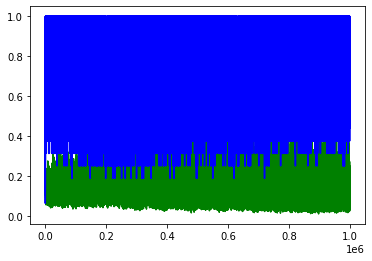

In [22]:
# Visualize training loss and accuracy
from matplotlib import pyplot as plt


epochs = list(range(len(training_loss_data)))
plt.plot(epochs, training_loss_data, 'g', label='Training loss')
plt.plot(epochs, training_accuracy_data, 'b', label='Training accuracy')

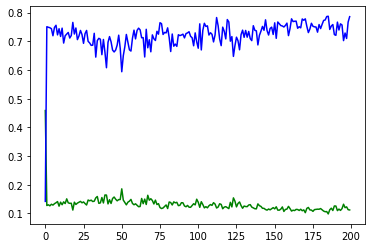

In [23]:
# Visualize validation loss and accuracy
from matplotlib import pyplot as plt


epochs = list(range(len(validation_loss_data)))
plt.plot(epochs, validation_loss_data, 'g', label='Validation loss')
plt.plot(epochs, validation_accuracy_data, 'b', label='Validation accuracy')

In [24]:
# prediction using latest model

In [25]:
def infer_on_data(trained_model, input_vec):
    out = trained_model(input_vec);
    predicted_class = torch.argmax(out);
    return predicted_class.item();

Predicted class: 9, Actual class: 9


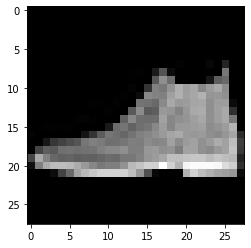

In [26]:
# Select any random image from test set

test_img = test_images[0];
actual_class = test_labels[0];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[0]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

Predicted class: 4, Actual class: 4


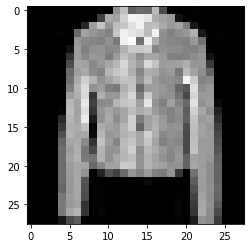

In [27]:
# Select any random image from test set

test_img = test_images[10];
actual_class = test_labels[10];

# For Visualization
img = convert_to_img(test_img);

predicted_class = infer_on_data(trained_model, test_images[10]);
print("Predicted class: {}, Actual class: {}".format(predicted_class, actual_class))
plt.imshow(img, cmap='gray');

In [28]:
from tqdm import tqdm

def check_accuracy_on_test(trained_model, input_vecs, target_vecs):
    accuracy = 0;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        if(predicted_class == target_vecs[i]):
            accuracy += 1;
    accuracy = accuracy/len(input_vecs)*100;
    return accuracy;

In [29]:
accuracy = check_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4713.11it/s]


75.98

In [30]:
# Experiment 1
# Network with 2 hidden layers
# Train Images - 50000
# Validation Images - 10000
# Learning rate - 0.1
# num_epochs=1000000,  train_batch_size=8, val_batch_size=2000, validation_after_n=10000
# Accuracy is 94.98 %

In [31]:
from tqdm import tqdm

def check_class_accuracy_on_test(trained_model, input_vecs, target_vecs):
    num_images_per_class = [0]*10; # 10 classes
    num_correct_per_class = [0]*10; # 10 classes;
    for i in tqdm(range(len(input_vecs))):
        predicted_class = infer_on_data(trained_model, input_vecs[i]);
        num_images_per_class[int(target_vecs[i])] += 1;
        if(predicted_class == target_vecs[i]):
            num_correct_per_class[int(target_vecs[i])] += 1;
    accuracy = np.array(num_correct_per_class)/np.array(num_images_per_class);
    accuracy = accuracy*100;
    acc = {};
    for i in range(len(accuracy)):
        acc[str(i)] = accuracy[i]
    return acc;

In [32]:
accuracy = check_class_accuracy_on_test(trained_model, test_images, test_labels);
accuracy

100%|██████████| 10000/10000 [00:02<00:00, 4913.82it/s]


{'0': 80.9,
 '1': 90.5,
 '2': 42.699999999999996,
 '3': 79.60000000000001,
 '4': 75.9,
 '5': 79.4,
 '6': 38.1,
 '7': 93.89999999999999,
 '8': 87.6,
 '9': 91.2}

# Weekly (Running) Assignments
** You will be working on these every week.


##Task 1
- Find 2 companies working in AI (CV, NLP) field on linkedin jobs or naukri (dot com) or any other job portal and note down what are the requirements they have.
- Also note down the kind of work they do and whether it interests you or not.

*This will help you understand the kind of companies that exist in this field and where you can apply for a job*


##Task 2
- Read 10 AI current news, and write a summary on it in the form of a short blog. - Publish it online (preferably medium)
Read about 2 research labs (from universities or private) and write a synopsis on the work they do. Publish it online (preferably medium)

*This will help you gain knowledge on the researches that are happening around the world in this space*


In [ ]:
# Licenses for the datasets used in the tutorial are mentioned with the data
# Author (Vendor) has no claims on the dataset or any elements of the dataset